<a href="https://colab.research.google.com/github/rinkeshdas01/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Rinkesh Das
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

**Problem Statement**- The task is to identify major customer segments on a transnational dataset which contains transactions occurring between 01/12/2010 and 9/12/2011 for a UK based and registered non-store online retail. The company mainly sells unique all occasion gifts.

This project contains the following steps:-
1.	Data Cleaning
2.	Exploratory Data Analysis (EDA)
3.	Data Preprocessing
4.	Model Training and Implementation
5.	Visualization of the clusters formed in various models
6.	Model Evaluation and Validation

After performing the steps mentioned above the following conclusions were obtained:-

•	From the evaluation metrics, KMeans Clustering has the lowest Davies Bouldin Score and highest Calinski Harabasz Score and Silhouette Score.
•	It is observed that in KMeans Clustering, Cluster 0 contains 41% of the customers , Cluster 1 contains 29% of the customers and the Cluster 2 contains 30% of the customers. So the distribution is quite acceptable.
•	So, we choose KMeans Clustering as the optimal model for our problem.




# **GitHub Link -**

https://github.com/rinkeshdas01/Online-Retail-Customer-Segmentation

# **Problem Statement**


**In this project, the task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import scipy.stats as stats
import missingno as msno

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Online Retail Customer Segmentation/Online Retail-1.xlsx'

In [ ]:
df=pd.read_excel(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

5268

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

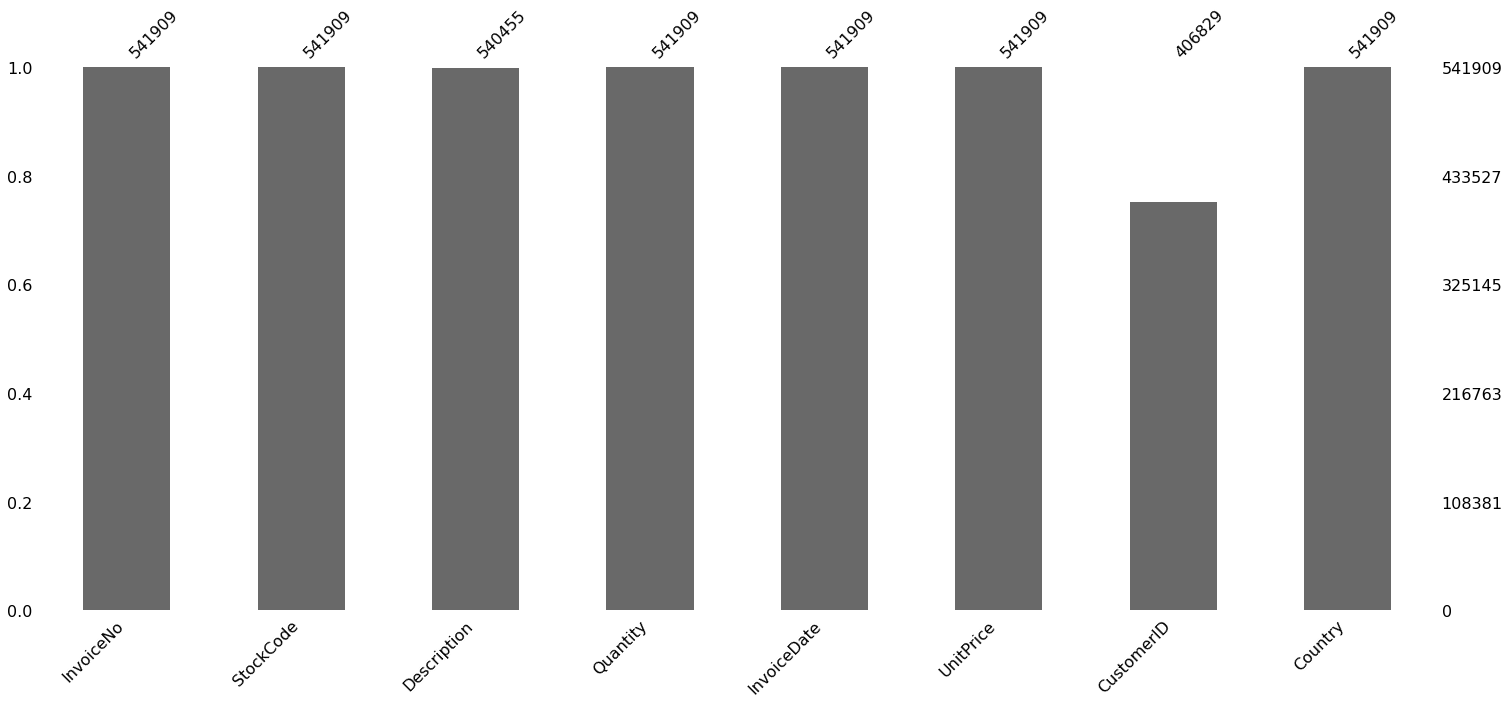

In [ ]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

The dataset contains 541909 rows and 8 columns.

It contains 136534 null values and 5268 duplicate values.

Out of all the null values Customer ID column contains 135080 null values and Description column contains 1454 null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

### Variables Description 

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
#Define a function to check the unique values for each variable
def unique_val(data,variables):
  for i in variables:
    print(data[i].unique())
    
    print("The number of unique values in",i,"is :  ",len(data[i].unique()))
    print('\n')

In [ ]:
variables=list(df.columns)
unique_val(df,variables)

[536365 536366 536367 ... 581585 581586 581587]
The number of unique values in InvoiceNo is :   25900


['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
The number of unique values in StockCode is :   4070


['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
The number of unique values in Description is :   4224


[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204   

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
#Dropping the null values as they cannot be replaced
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.duplicated().sum()

5225

In [ ]:
#Dropping the duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df_copy=df.copy()

In [ ]:
#Creating a revenue variable
df_copy['Revenue']=df_copy['Quantity']*df_copy['UnitPrice']
df_copy[df_copy['Revenue']<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom   -27.50  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom    -4.65  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom   -19.80  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom    -6.96  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom    -6.96  
...                    ...        ...         ...             ...      ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom    -9.13  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  -224.69  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom   -54.75  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom    -1.25  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom    -6.25  

[8872 rows x 9 columns]

We observe that there are negative values for Revenue. This is due to the cancelled orders. We know that if a customer cancels an order, it does not take anything away from the revenue so a zero revenue makes more sense than a negative revenue.

In [ ]:
#Replacing negative revenue with 0
rev_new=[]
rev_lst=list(df_copy['Revenue'])
for i in rev_lst:
  if i<0:
    rev_new.append(0)
  else:
    rev_new.append(i)
df_copy['Revenue_revised']=rev_new

In [ ]:
df_copy.drop(['Revenue'],axis=1,inplace=True)
df_copy[df_copy['Revenue_revised']<0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Revenue_revised]
Index: []

In [ ]:
#Converting Invoice Date to datetime format
df_copy['InvoiceDate']=pd.to_datetime(df_copy['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [ ]:
df_copy['Month']=df_copy['InvoiceDate'].dt.month

In [ ]:
df_copy['Year']=df_copy['InvoiceDate'].dt.year

In [ ]:
df_copy['Weekday']=df_copy['InvoiceDate'].dt.weekday
df_copy['Day Of Month']=df_copy['InvoiceDate'].dt.day

In [ ]:
df_copy.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Revenue_revised  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom            15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom            20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom            22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom            20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom            20.34   

   Month  Year  Weekday  Day Of Month  
0     12  2010        2             1  
1     12  2010        2             1  
2     12  2010        2             1  
3     12  2010        2             1  
4     12  2010        2             1

In [ ]:
#Cancelled Orders
df_copy['Cancelled']=df_copy['InvoiceNo'].astype(str).str.contains(pat='C')

In [ ]:
df_copy['Cancelled'].value_counts()

False    392732
True       8872
Name: Cancelled, dtype: int64

In [ ]:
df_copy[df_copy['Cancelled']==1]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  \
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom   
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom   
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom   
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom   
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom   
...                    ...        ...         ...             ...   
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom   
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom   
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom   
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom   
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom   

        Revenue_revised  Month  Year  Weekday  Day Of Month  Cancelled  
141                 0.0     12  2010        2             1       True  
154                 0.0     12  2010        2             1       True  
235                 0.0     12  2010        2             1       True  
236                 0.0     12  2010        2             1       True  
237                 0.0     12  2010        2             1       True  
...                 ...    ...   ...      ...           ...        ...  
540449              0.0     12  2011        4             9       True  
541541              0.0     12  2011        4             9       True  
541715              0.0     12  2011        4             9       True  
541716              0.0     12  2011        4             9       True  
541717              0.0     12  2011        4             9       True  

[8872 rows x 14 columns]

In [ ]:
df_copy[df_copy['Cancelled']==1]['Quantity'].unique()

array([    -1,    -12,    -24,     -6,     -2,     -4,     -5,     -7,
           -3,  -9360,    -36,   -192,   -144,    -48,    -50,     -8,
          -20,    -10,    -72,    -11,    -25,    -14,    -33,     -9,
          -47,    -18,    -96,    -15,    -30,    -60,    -16,   -240,
          -32,    -80,   -300,   -500,    -23,    -13,    -21,   -150,
          -17,    -40,   -100, -74215,   -120,   -600,    -42,    -94,
          -76,   -200,   -720,    -86,    -35,   -102,    -49,    -46,
          -64,   -624,    -27,   -432,    -58,   -670,  -1300,  -1930,
        -2000,  -3114,    -51,   -960,  -1350,    -52,    -22,  -1515,
         -420,    -19,   -480,   -164,   -160,   -576,   -108,   -250,
         -408,    -37,   -360,    -28,    -75,   -121,   -288,    -39,
         -828,   -701,   -140,   -400,   -252,   -110,   -334,   -318,
         -126,   -113,   -180,    -38,   -756,   -152,    -85,    -34,
         -312,    -79,    -43,    -31,   -186,    -53,    -82,    -70,
      

We observe that all the cancelled orders have negative quantity in the dataset.

In [ ]:
df_copy.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Revenue_revised  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom            15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom            20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom            22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom            20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom            20.34   

   Month  Year  Weekday  Day Of Month  Cancelled  
0     12  2010        2             1      False  
1     12  2010        2             1      False  
2     12  2010        2             1      False  
3     12  2010        2             1      False  
4     12  2010        2             1      False

In [ ]:
df_copy['Cancelled'].astype(str)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: Cancelled, Length: 401604, dtype: object

In [ ]:
df_copy['Cancelled'].value_counts()

False    392732
True       8872
Name: Cancelled, dtype: int64

In [ ]:
df_copy['Cancelled'].replace({'False':0,'True':1},inplace=True)

### What all manipulations have you done and insights you found?

The data was cleaned by dropping the null and duplicate values.

A revenue variable was created to know the revenue contributed by the order and all the values with negative revenue were replaced by zero.

The cancelled orders were observed.

The date variable was splitted into its constituents for easy analysis.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

### No. of quantities of a particular product

Text(0.5, 1.0, 'Most Sold Product')

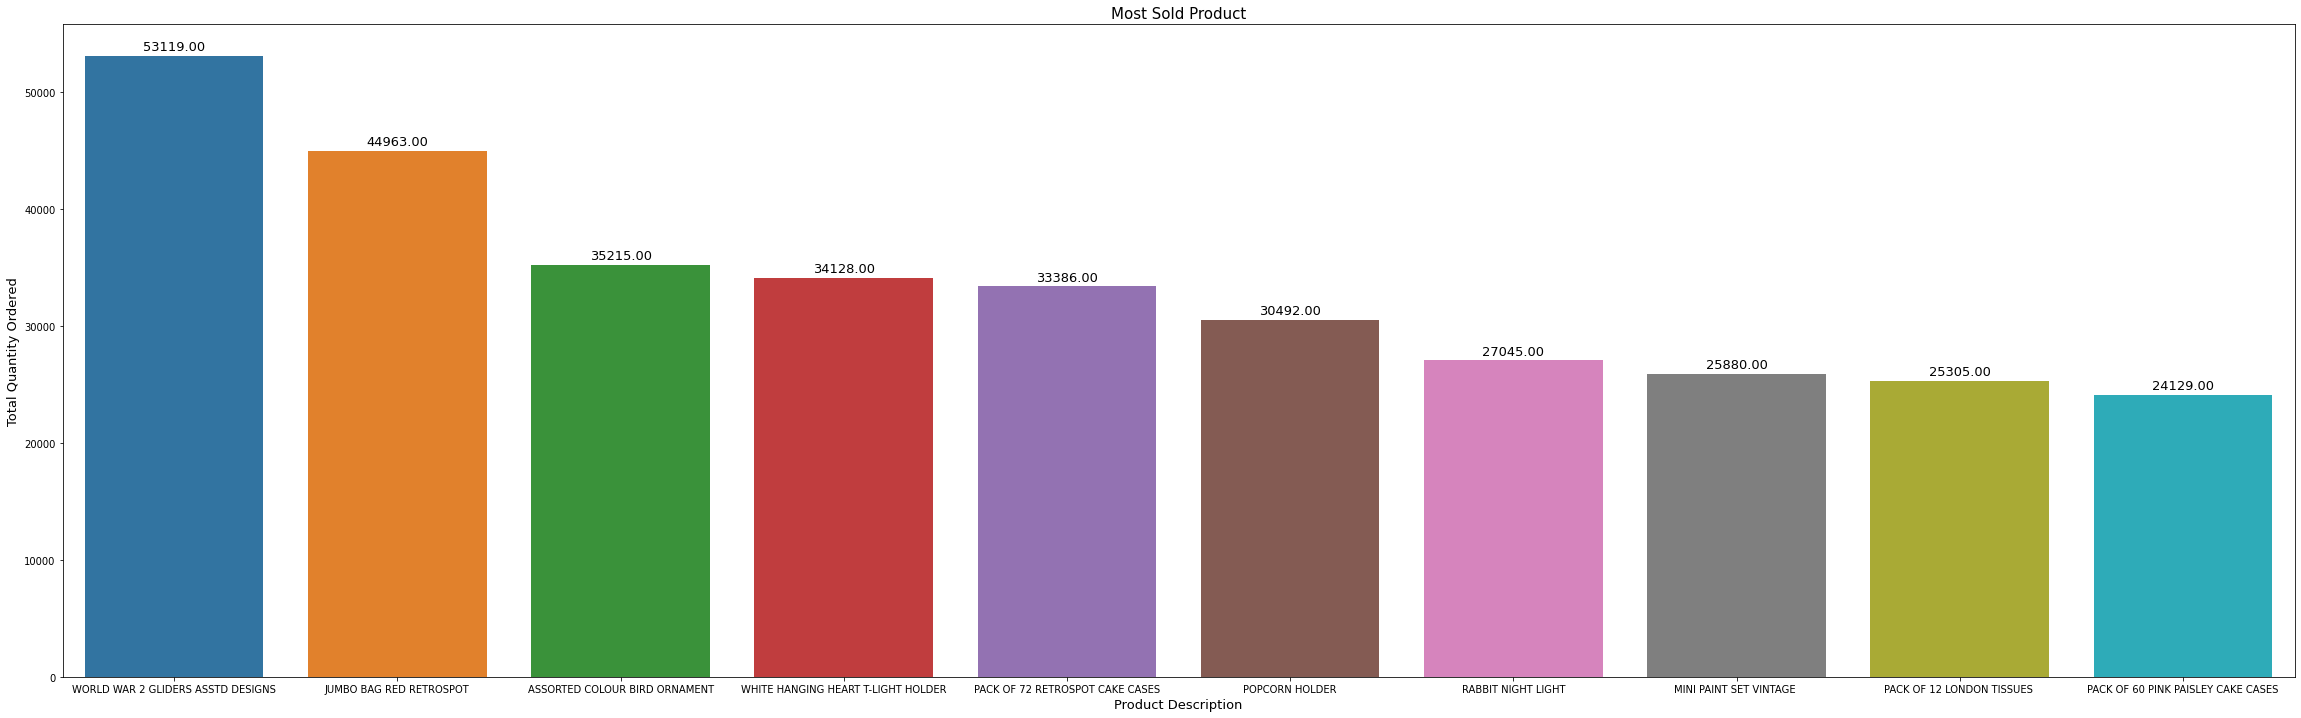

In [ ]:
# Chart - 1 visualization code
prod_q=df_copy.groupby(['Description'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
plt.figure(figsize=(40,12))
plot_prod_q=sns.barplot(data=prod_q.head(10),x='Description',y='Quantity')
for bar in plot_prod_q.patches:
  plot_prod_q.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Product Description',size=13)
plt.ylabel('Total Quantity Ordered',size=13)
plt.title('Most Sold Product',size=15)

##### 1. Why did you pick the specific chart?

This chart gives us the number of quantities in which various products were ordered in order to give us the product ordered in most quantity.

##### 2. What is/are the insight(s) found from the chart?

World War 2 Gliders Asstd Design has been ordered in most quantity.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is important to know the product that gets ordered in most quantity as it helps in stock management and keep the continuous supply of the product.

#### Chart - 2

### Most Expensive and Inexpensive Product

Text(0.5, 1.0, 'Most Expensive Products')

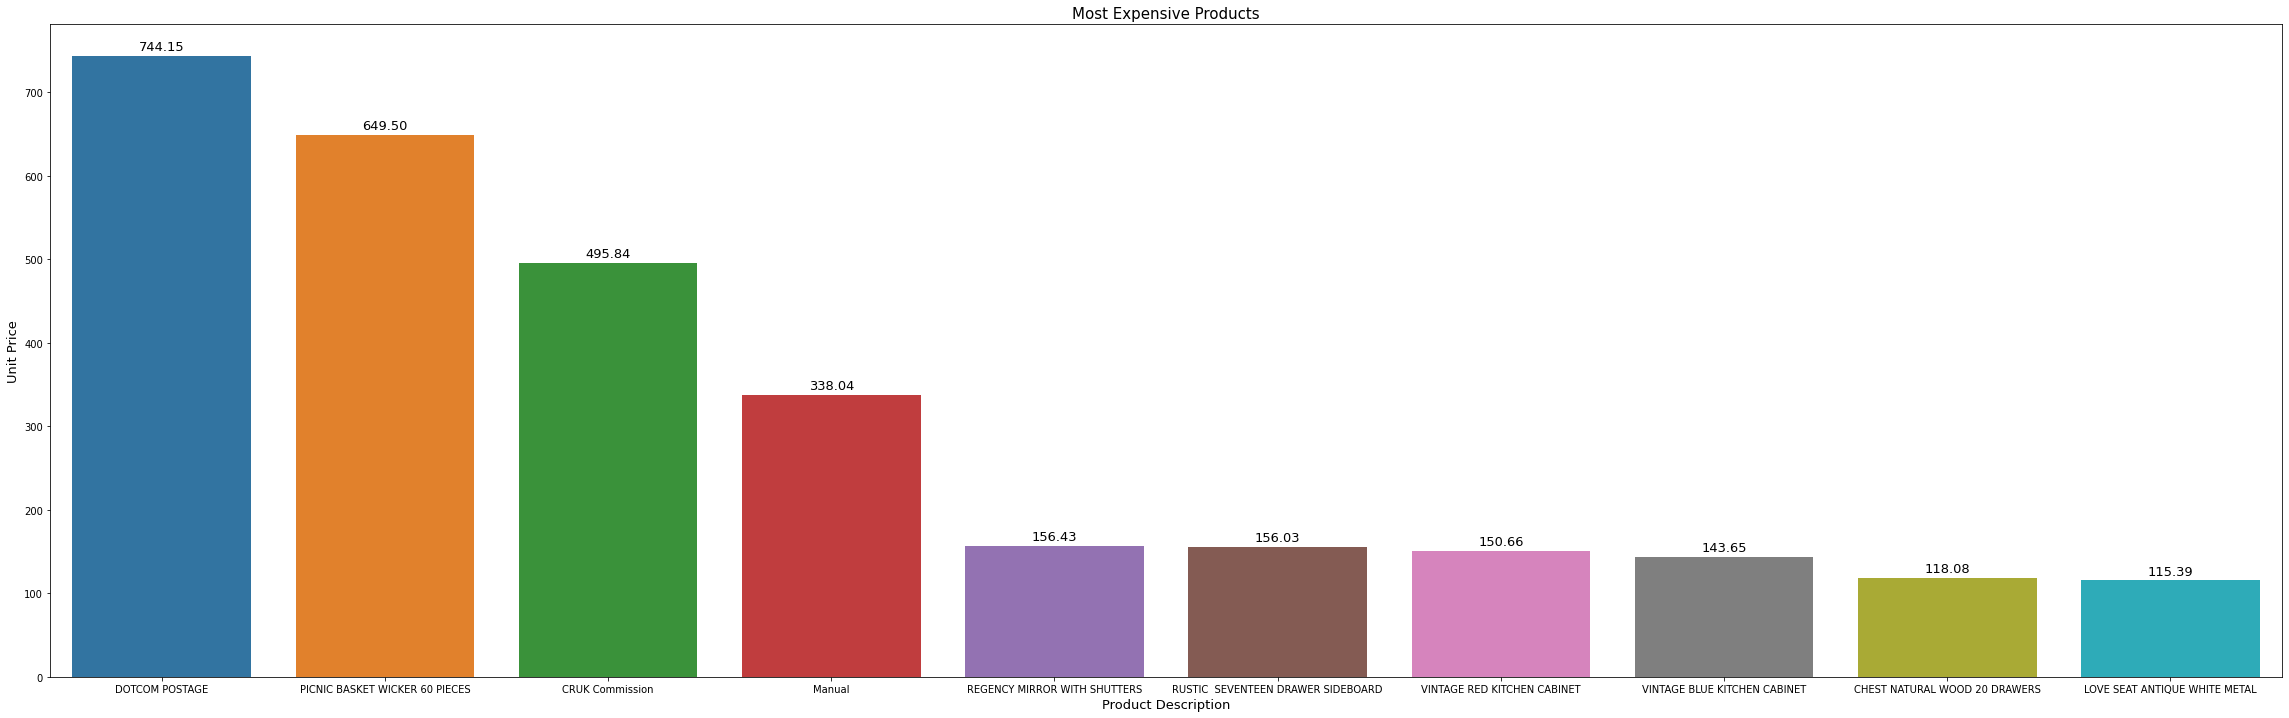

In [ ]:
# Chart - 2 visualization code
#Most Expensive product
prod_price_exp=df_copy.groupby(['Description'],as_index=False)['UnitPrice'].mean().sort_values(by='UnitPrice',ascending=False)
plt.figure(figsize=(40,12))
plot_prod_price_exp=sns.barplot(data=prod_price_exp.head(10),x='Description',y='UnitPrice')
for bar in plot_prod_price_exp.patches:
  plot_prod_price_exp.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Product Description',size=13)
plt.ylabel('Unit Price',size=13)
plt.title('Most Expensive Products',size=15)

##### 1. Why did you pick the specific chart?

This chart gives us the mlst expensive product in the store.

##### 2. What is/are the insight(s) found from the chart?

Dotcom Postage is the most expensive product.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

### Least expensive product

Text(0.5, 1.0, 'Least expensive Products')

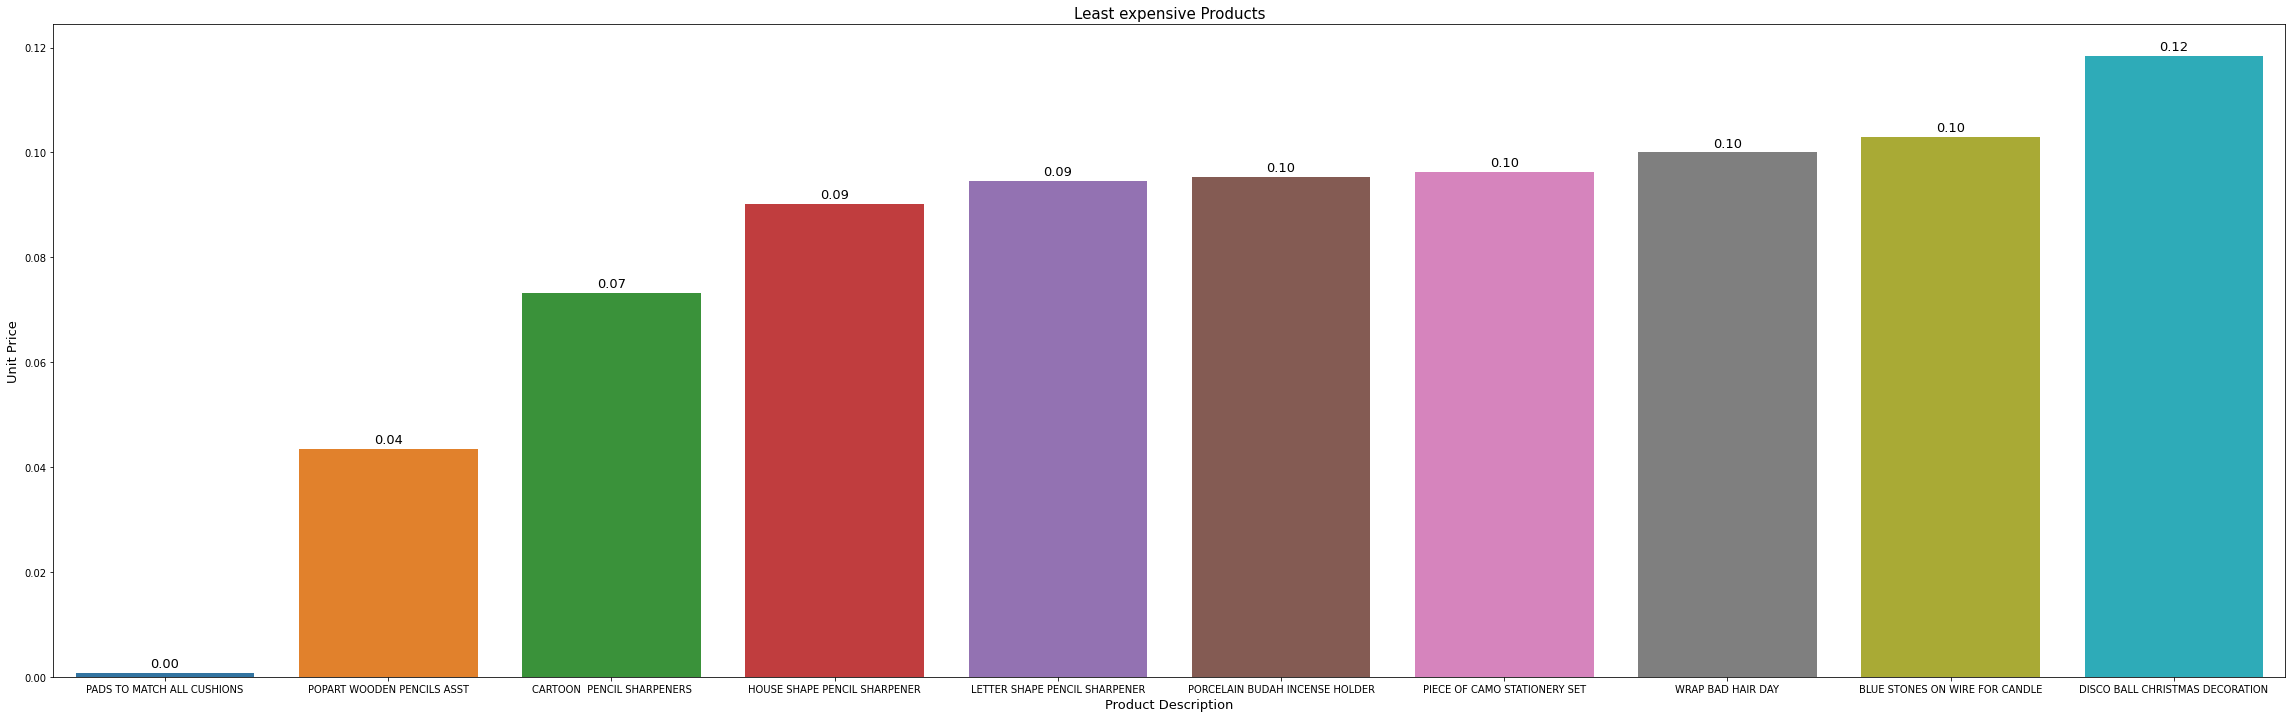

In [ ]:
# Chart - 3 visualization code
#Most inexpensive product
prod_price_inexp=df_copy.groupby(['Description'],as_index=False)['UnitPrice'].mean().sort_values(by='UnitPrice',ascending=True)
plt.figure(figsize=(40,12))
plot_prod_price_inexp=sns.barplot(data=prod_price_inexp.head(10),x='Description',y='UnitPrice')
for bar in plot_prod_price_inexp.patches:
  plot_prod_price_inexp.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Product Description',size=13)
plt.ylabel('Unit Price',size=13)
plt.title('Least expensive Products',size=15)

##### 1. Why did you pick the specific chart?

This chart gives us the product that is the least expensive.

##### 2. What is/are the insight(s) found from the chart?

Pads to match all cushions and popart wooden pencils asst are the most inexpensive product.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 4

### Frequently ordered product

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequently ordered products')

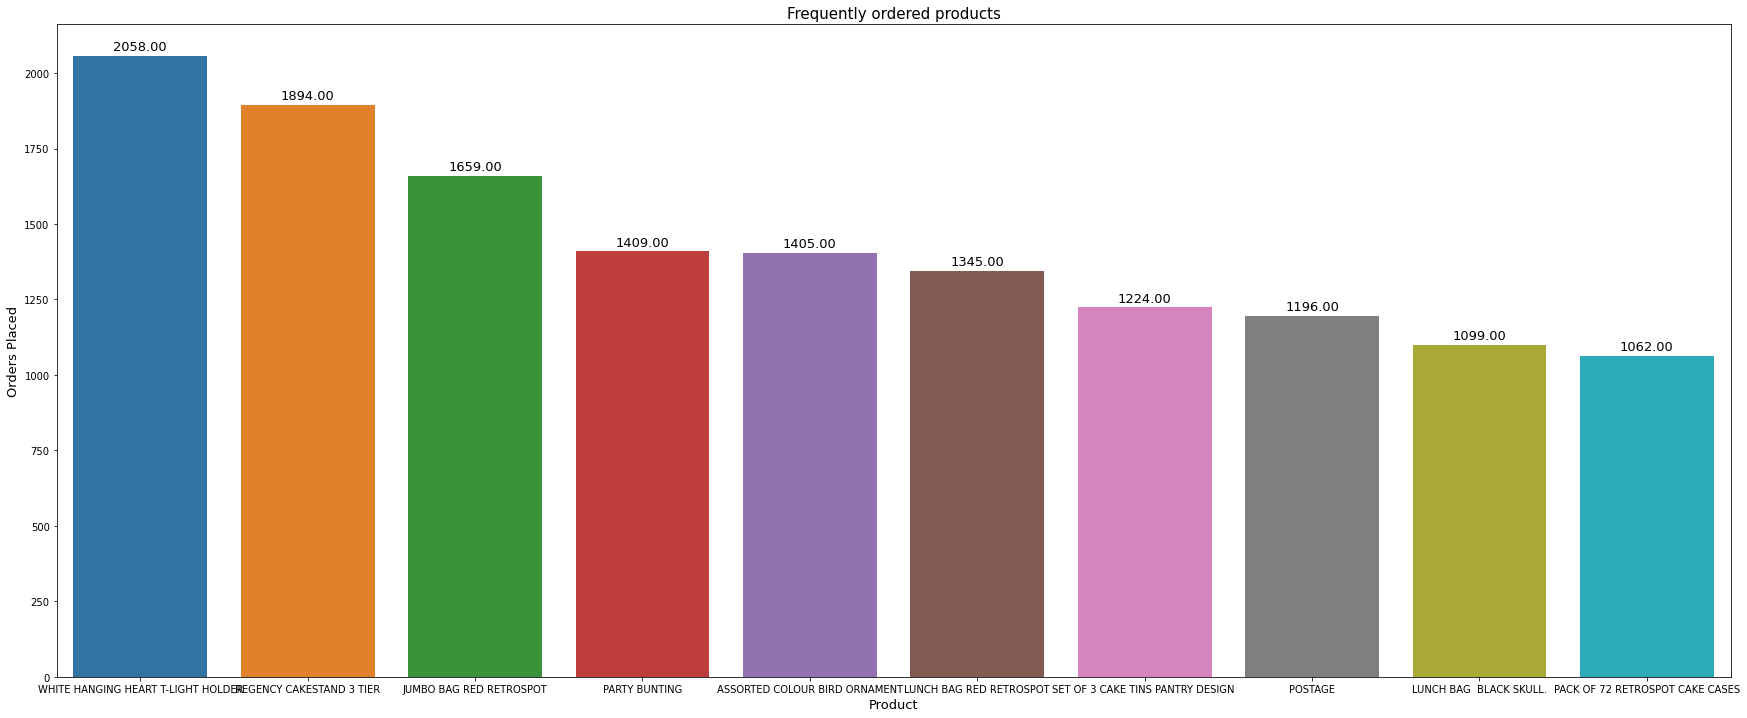

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(30,12))
desc_count=sns.countplot(df_copy['Description'],order=df_copy['Description'].value_counts()[:10].index)
for bar in desc_count.patches:
  desc_count.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Product',size=13)
plt.ylabel('Orders Placed',size=13)
plt.title('Frequently ordered products',size=15)

##### 1. Why did you pick the specific chart?

This chart gives us the product that is most frequently ordered.

##### 2. What is/are the insight(s) found from the chart?

White Hanging Heart T-Light Holder is the most frequently ordered product.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is important to know the most frequently ordered product as it helps in maintaining the right amount of stock of the product.

#### Chart - 5

### Revenue generated by countries

Text(0.5, 1.0, 'Countries generating most revenue')

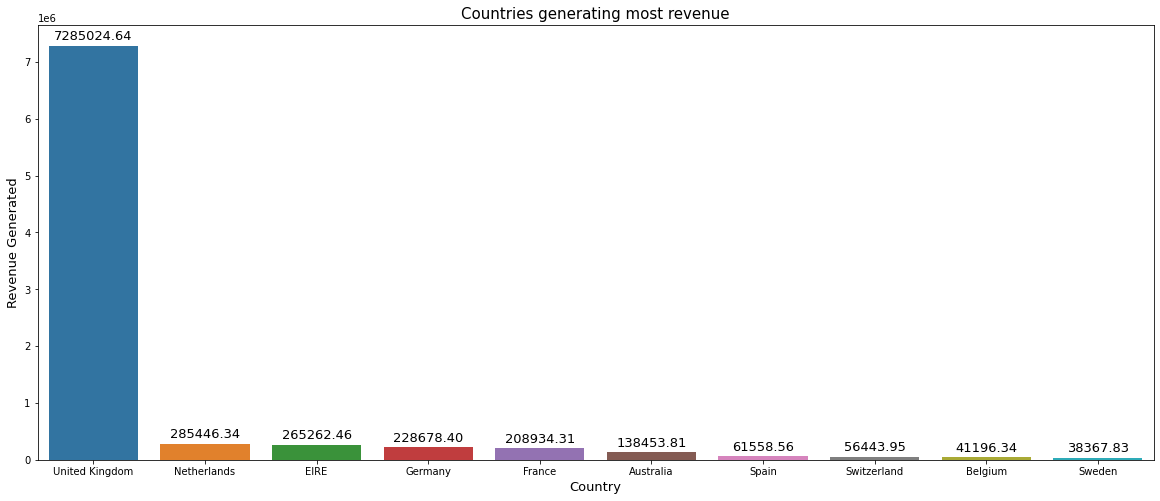

In [ ]:
# Chart - 5 visualization code
#Revenue Generated By countries
coun_rev=df_copy.groupby(['Country'],as_index=False)['Revenue_revised'].sum().sort_values(by='Revenue_revised',ascending=False)
plt.figure(figsize=(20,8))
plot_coun_rev=sns.barplot(data=coun_rev.head(10),x='Country',y='Revenue_revised')
for bar in plot_coun_rev.patches:
  plot_coun_rev.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Country',size=13)
plt.ylabel('Revenue Generated',size=13)
plt.title('Countries generating most revenue',size=15)

##### 1. Why did you pick the specific chart?

This chart tells us the revenue contributed by various countries.

##### 2. What is/are the insight(s) found from the chart?

Most of the revenue is generated by UK followed by Netherlands.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is important to know which country generates the most revenue for the store so that it can prioritize its policies and other offers according to those countries.

#### Chart - 6

### Countries placing most number of orders.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countries placing most no. of Orders')

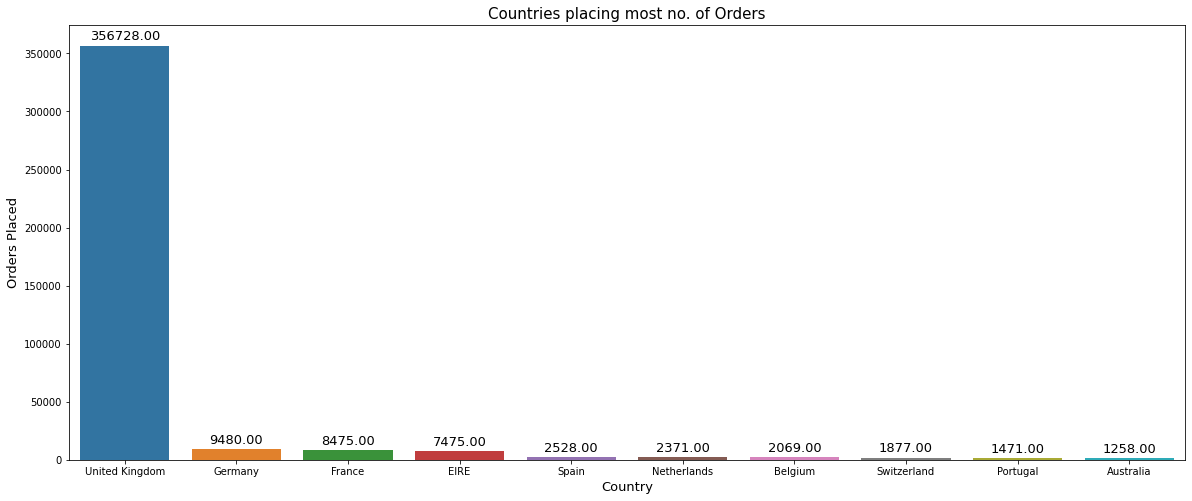

In [ ]:
# Chart - 6 visualization code
#Countries placing most orders
plt.figure(figsize=(20,8))
coun_count=sns.countplot(df_copy['Country'],order=df_copy['Country'].value_counts()[:10].index)
for bar in coun_count.patches:
  coun_count.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Country',size=13)
plt.ylabel('Orders Placed',size=13)
plt.title('Countries placing most no. of Orders',size=15)

##### 1. Why did you pick the specific chart?

This chart tells us to which vountry do most of the customers belong to.

##### 2. What is/are the insight(s) found from the chart?

Most of the orders are placed from the UK.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is important to know where do most of the customers belong to as it will help the store to serve them better.

#### Chart - 7

### Order Cancelled from different Countries

Text(0.5, 1.0, 'Order Cancellation % of Countries')

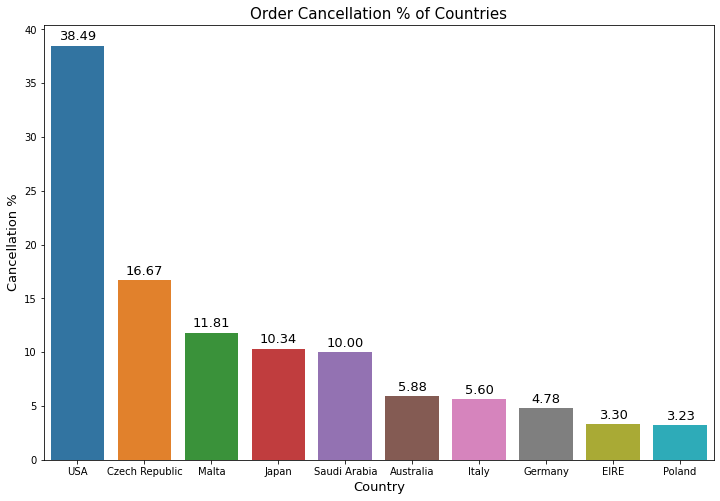

In [ ]:
# Chart - 7 visualization code
coun_canc=df_copy.groupby(['Country'],as_index=False).agg({'Cancelled':['sum','count']})
coun_canc.columns=['Country','Cancelled','Total Orders']
coun_canc['Cancellation %']=(coun_canc['Cancelled']/coun_canc['Total Orders'])*100
coun_canc=coun_canc.sort_values(by='Cancellation %',ascending=False)
plt.figure(figsize=(12,8))
plot_coun_canc=sns.barplot(data=coun_canc.head(10),x='Country',y='Cancellation %')
for bar in plot_coun_canc.patches:
  plot_coun_canc.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Country',size=13)
plt.ylabel('Cancellation %',size=13)
plt.title('Order Cancellation % of Countries',size=15)

##### 1. Why did you pick the specific chart?

This chart tells us which country has the highest order cancellation %.

##### 2. What is/are the insight(s) found from the chart?

Most of the orders are cancelled from USA.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 8

### Revenue generated per month

Text(0.5, 1.0, 'Revenue generated per month')

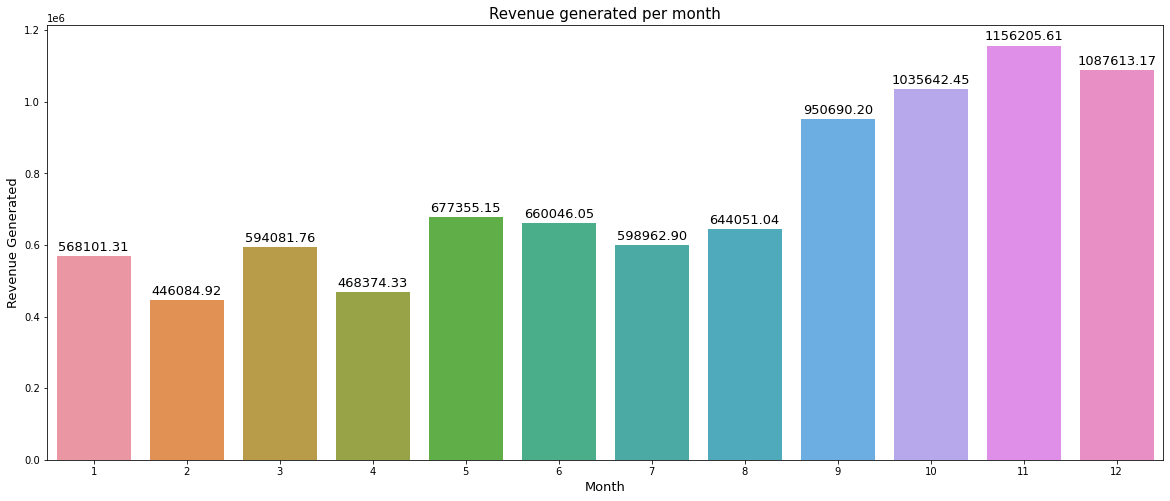

In [ ]:
# Chart - 8 visualization code
month_rev=df_copy.groupby(['Month'],as_index=False)['Revenue_revised'].sum()
plt.figure(figsize=(20,8))

month_rev=sns.barplot(data=month_rev,x='Month',y='Revenue_revised')
for bar in month_rev.patches:
  month_rev.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Month',size=13)
plt.ylabel('Revenue Generated',size=13)
plt.title('Revenue generated per month',size=15)


##### 1. Why did you pick the specific chart?

This chart gives us the revenue generated per month.

##### 2. What is/are the insight(s) found from the chart?

The highest revenue is generated in November and the lowest in April.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is important for the store to know how much revenue it makes across the year. The store can come up with offers in the months where the revenue is less in order to increase revenue.

#### Chart - 9

### Orders placed per month

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Orders placed per month')

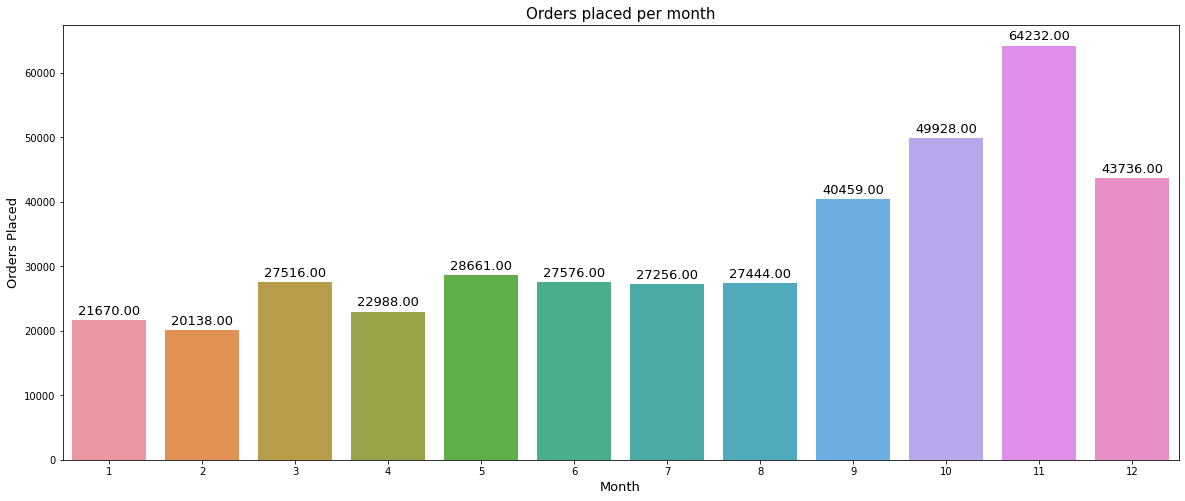

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(20,8))
month_count=sns.countplot(df_copy['Month'])
for bar in month_count.patches:
  month_count.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Month',size=13)
plt.ylabel('Orders Placed',size=13)
plt.title('Orders placed per month',size=15)

##### 1. Why did you pick the specific chart?

This chart gives us the orders placed per month.

##### 2. What is/are the insight(s) found from the chart?

The highest number of orders are placed in November and lowest in April.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights are the same as in the previous chart.

#### Chart - 10

### Orders received each day of the week.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Order placed each day of the week')

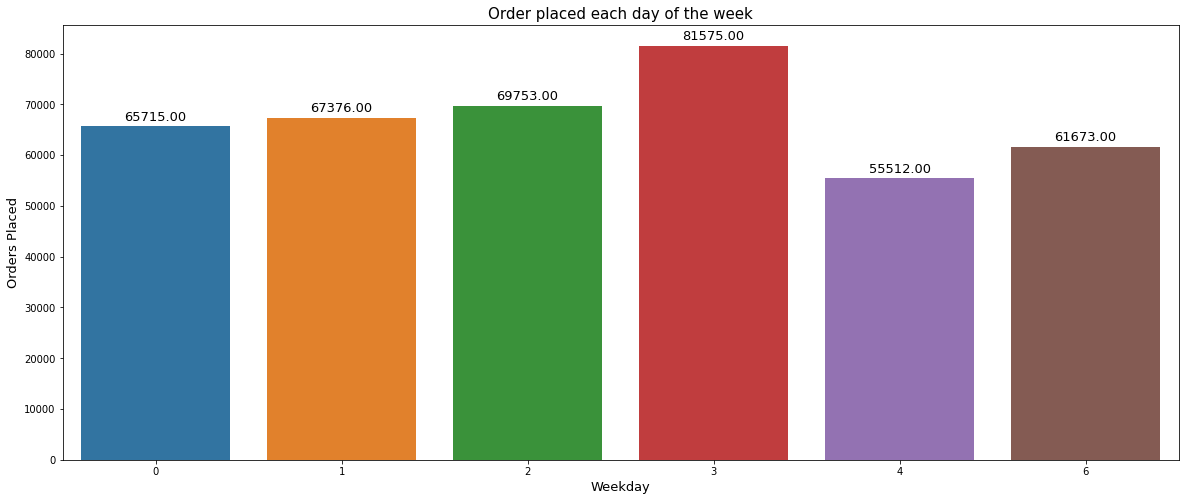

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(20,8))
wd_count=sns.countplot(df_copy['Weekday'])
for bar in wd_count.patches:
  wd_count.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Weekday',size=13)
plt.ylabel('Orders Placed',size=13)
plt.title('Order placed each day of the week',size=15)

##### 1. Why did you pick the specific chart?

This chart gives us the number of orders placed throughout the week.

##### 2. What is/are the insight(s) found from the chart?

Thursday receives the most number of orders and Friday receives the least number of orders.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is important for the store to know how many orders are placed throughout the week. The store can come up with offers in the days where the orders are less in order to increase revenue.

#### Chart - 11

### Orders placed each day of the month

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Order placed each day of the month')

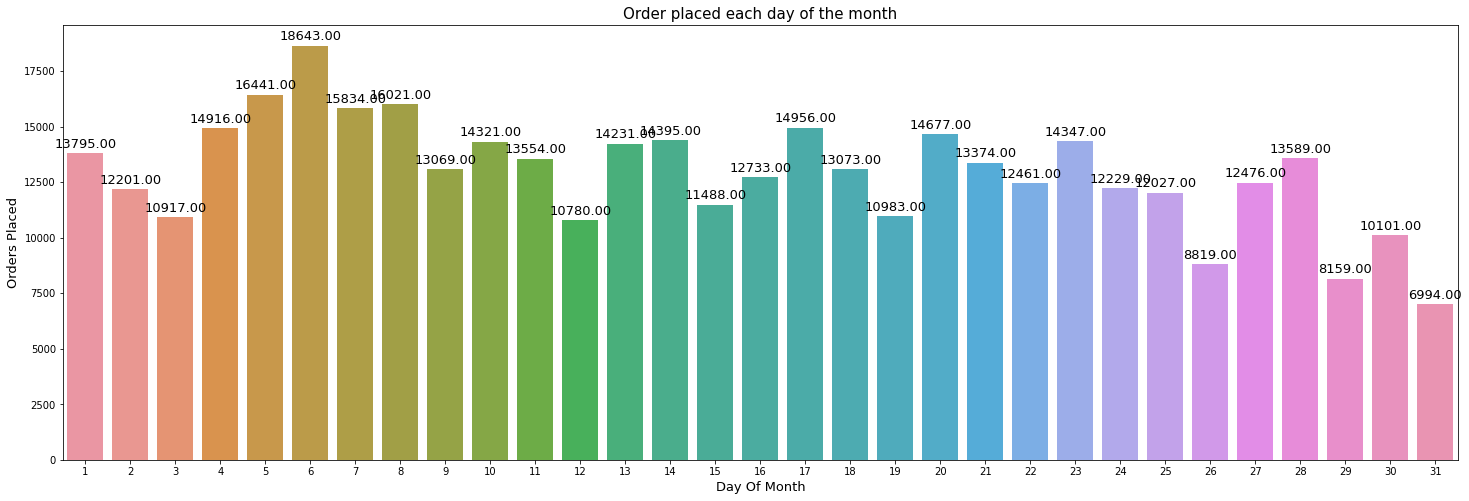

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(25,8))
mn_count=sns.countplot(df_copy['Day Of Month'])
for bar in mn_count.patches:
  mn_count.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Day Of Month',size=13)
plt.ylabel('Orders Placed',size=13)
plt.title('Order placed each day of the month',size=15)

##### 1. Why did you pick the specific chart?

This chart tells us the numbers of orders placed throughout the month.

##### 2. What is/are the insight(s) found from the chart?

The 6th day of the month receives the highest number of orders. The number of orders in the 1st 8 days of the month is comparatively higher than the rest of the days.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

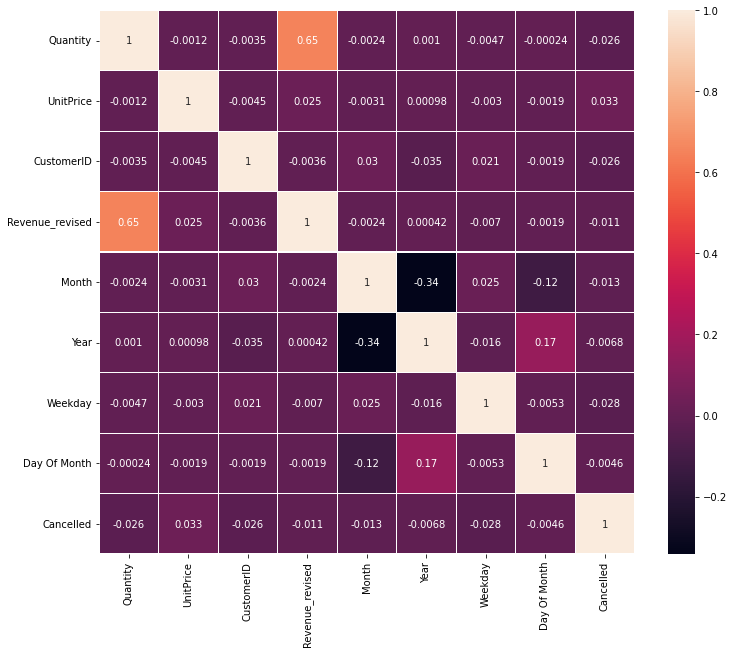

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10))
sns.heatmap(df_copy.corr(method='pearson'),annot=True,linewidths=0.2)

##### 1. Why did you pick the specific chart?

The correlation heatmap tells us how are the features dependent on each other.

##### 2. What is/are the insight(s) found from the chart?

Most of the features have low or moderate correlation. None of them are highly correlated.

#### Chart - 15 - Pair Plot 

In [ ]:
df_copy.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue_revised', 'Month',
       'Year', 'Weekday', 'Day Of Month', 'Cancelled'],
      dtype='object')

In [ ]:
# Pair Plot visualization code
sns.pairplot(data=df_copy,kind='scatter',vars=['Quantity','UnitPrice','Revenue_revised'])

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f756de20280> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f756db42e50> (for post_execute):


KeyboardInterrupt: ignored

##### 1. Why did you pick the specific chart?

Pairplot also shows the dependency and relationship of the features with each other.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The variance of revenue across all the months of the year is the same.

2. The variance of revenue throughout the week is same.

3. The revenue feature is normally distributed.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis- The average revenue generated is same for all the months of the year.

Alternate Hypothesis- The average revenue generated is not same for all the months of the year.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
new=ols('Revenue_revised ~ Month',data=df_copy).fit()
an=sm.stats.anova_lm(new,typ=2)

In [ ]:
an

sum_sq        df         F    PR(>F)
Month     2.181383e+05       1.0  2.304785  0.128977
Residual  3.800995e+10  401602.0       NaN       NaN

Thus, the null hypothesis is rejected.

##### Which statistical test have you done to obtain P-Value?

I have used the Anova test.

##### Why did you choose the specific statistical test?

ANOVA test is an appropriate statisical test to compare the variance between two samples.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis- The average revenue generated is same for all the days of the week.

Alternate Hypothesis- The average revenue generated is not same for all the days of the week.

#### 2. Perform an appropriate statistical test.

#### 2. Perform an appropriate statistical test.

In [ ]:
new_w=ols('Revenue_revised ~ Weekday',data=df_copy).fit()
an_w=sm.stats.anova_lm(new_w,typ=2)

In [ ]:
an_w

sum_sq        df          F    PR(>F)
Weekday   1.878684e+06       1.0  19.850493  0.000008
Residual  3.800829e+10  401602.0        NaN       NaN

Thus the null hypothesis is rejected.

##### Which statistical test have you done to obtain P-Value?

I have used the Anova test.

##### Why did you choose the specific statistical test?

ANOVA test is an appropriate statisical test to compare the variance between two samples.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis- The revenue feature is normally distributed.

Alternate Hypothesis- The revenue feature is not normally distributed.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro
test_var=df_copy['Revenue_revised']
stat,p_value=shapiro(test_var)
print(p_value)
if p_value <0.05:
  print('We reject the null hypothesis\n\n')
else:
  print('We fail to reject the null hypothesis\n\n')

0.0
We reject the null hypothesis




/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


##### Which statistical test have you done to obtain P-Value?

I have used the Shapiro- Wilk Test.

##### Why did you choose the specific statistical test?

Shapiro Wilk test is an appropriate test to see if the feature is normally distributed.

## ***6. Feature Engineering & Data Pre-processing***

## **Types of Market Segmentation**


Market segmentation can be done in the following ways:-


> Demographic Segmentation


> Psychographic Segmentation


> Geographic Segmentation


> Firmographic Segmentation











According to the data that we have behavorial segmentation will be the best method.
The suitable Analysis for our dataset is the RFM (Recency-Frequency-Monetary) Analysis.

RFM model is a proven marketing strategy based on customer behavior segmentation. It groups customers based on their purchase history – how recently, with what Frequency, and what value they bought.

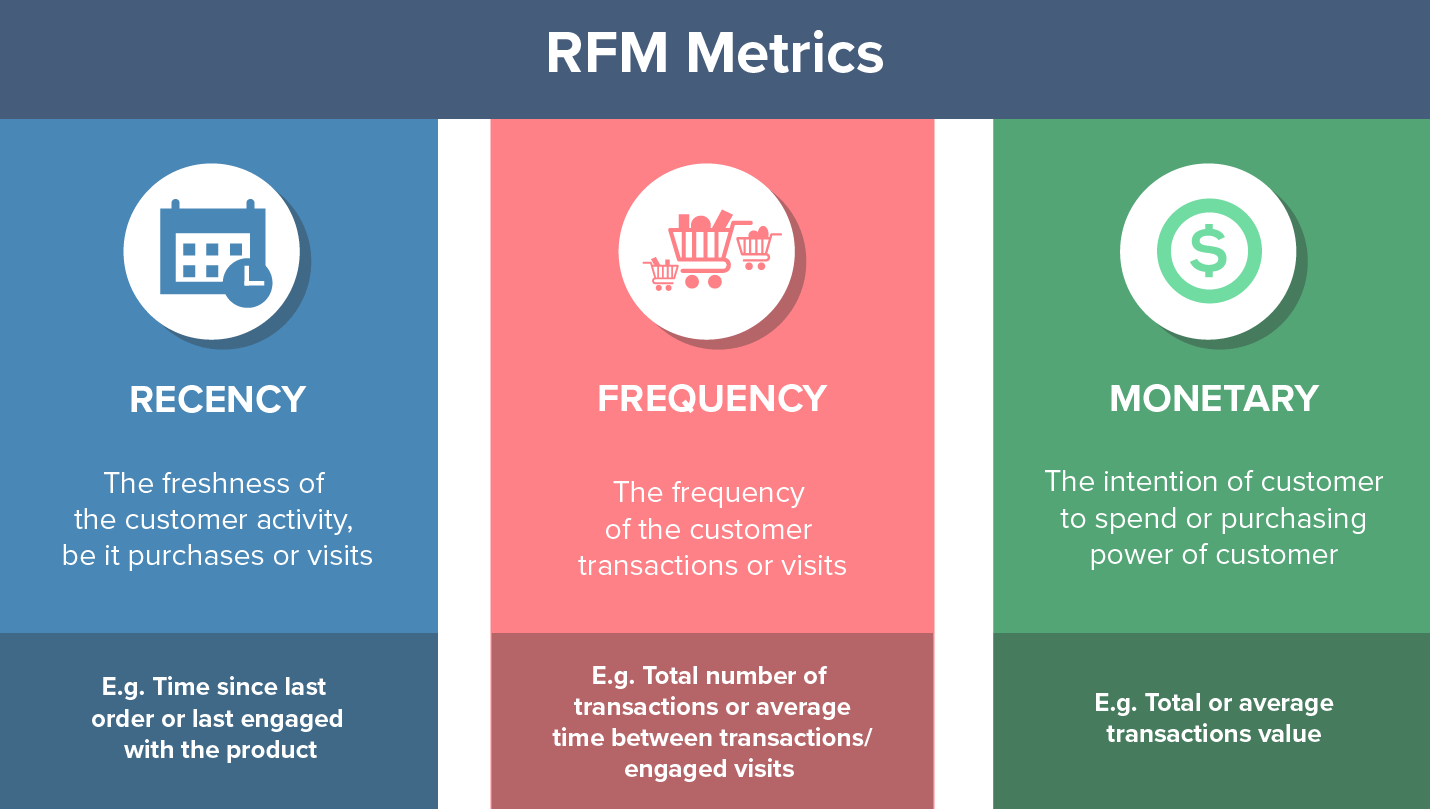

In [ ]:
df1=df.copy()

 Cancelled orders do not contribute anything to the company. Also they are not required for the segmentation. We know that in the dataset, the cancelled orders have a negative quantity. So we shall only keep all the positive values of the dataset.

In [ ]:
df1=df1[df1['Quantity']>=0]

In [ ]:
df1['Revenue']=df1['Quantity']*df1['UnitPrice']
df1['Revenue'].value_counts()

<ipython-input-57-ce40e6ea7dac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Revenue']=df1['Quantity']*df1['UnitPrice']


15.00      20026
17.70       9156
16.50       8470
10.20       8009
19.80       7608
           ...  
1305.60        1
277.92         1
481.50         1
89.64          1
66.36          1
Name: Revenue, Length: 2940, dtype: int64

In [ ]:
df1[df1['Revenue']<0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Revenue]
Index: []

In [ ]:
revenue_contribution=df1.groupby(['CustomerID'],as_index=False)['Revenue'].sum()
revenue_contribution.head()

CustomerID   Revenue
0     12346.0  77183.60
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40

In [ ]:
#Creating a frequency dataframe by counting the invoice number for each Customer ID
frequency=df1.groupby(['CustomerID'],as_index=False)['InvoiceNo'].count()
frequency.head()

CustomerID  InvoiceNo
0     12346.0          1
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17

In [ ]:
#Creating the duration dataframe by extracting values from the Invoice Date
df1['InvoiceDate']=pd.to_datetime(df1['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [ ]:
df1['duration']=df1['InvoiceDate'].max()-df1['InvoiceDate']

In [ ]:
recency=df1.groupby(['CustomerID'],as_index=False)['duration'].min()
recency.head()

CustomerID          duration
0     12346.0 325 days 02:49:00
1     12347.0   1 days 20:58:00
2     12348.0  74 days 23:37:00
3     12349.0  18 days 02:59:00
4     12350.0 309 days 20:49:00

In [ ]:
#Merging the 3 dataframes 
fm=pd.merge(revenue_contribution,frequency,on='CustomerID',how='inner')
rfm=pd.merge(fm,recency,on='CustomerID',how='inner')
rfm.columns=['CustomerID','Revenue','Frequency','Recency']
rfm.head()

CustomerID   Revenue  Frequency           Recency
0     12346.0  77183.60          1 325 days 02:49:00
1     12347.0   4310.00        182   1 days 20:58:00
2     12348.0   1797.24         31  74 days 23:37:00
3     12349.0   1757.55         73  18 days 02:59:00
4     12350.0    334.40         17 309 days 20:49:00

In [ ]:
rfm['Recency']=rfm['Recency'].dt.days



In [ ]:
rfm.head()

CustomerID   Revenue  Frequency  Recency
0     12346.0  77183.60          1      325
1     12347.0   4310.00        182        1
2     12348.0   1797.24         31       74
3     12349.0   1757.55         73       18
4     12350.0    334.40         17      309

In [ ]:
rfm.shape

(4339, 4)

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

The missing values have already been dropped.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


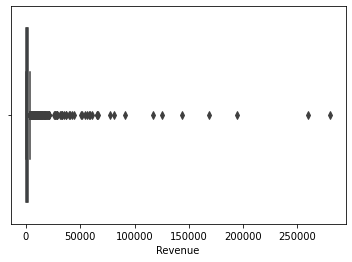

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


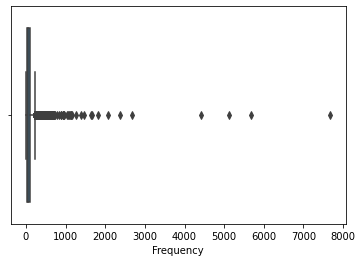

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


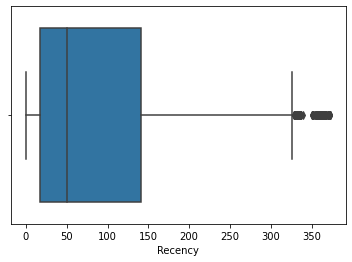

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(rfm['Revenue'])
plt.show()
sns.boxplot(rfm['Frequency'])
plt.show()
sns.boxplot(rfm['Recency'])
plt.show()

In [ ]:
#Upper and lower limit of Recency
Q1_rc=rfm['Recency'].quantile(0.05)
Q3_rc=rfm['Recency'].quantile(0.95)
IQR_rc=Q3_rc-Q1_rc
ul_rc=Q3_rc+1.5*IQR_rc
ll_rc=Q1_rc-1.5*IQR_rc
ul_rc,ll_rc

(774.5, -461.5)

In [ ]:
#Upper and lower limit of Frequency
Q1_f=rfm['Frequency'].quantile(0.05)
Q3_f=rfm['Frequency'].quantile(0.95)
IQR_f=Q3_f-Q1_f
ul_f=Q3_f+1.5*IQR_f
ll_f=Q1_f-1.5*IQR_f
ul_f,ll_f

(764.0, -452.0)

In [ ]:
#Upper and lower limit of Revenue
Q1_rv=rfm['Revenue'].quantile(0.05)
Q3_rv=rfm['Revenue'].quantile(0.95)
IQR_rv=Q3_rv-Q1_rv
ul_rv=Q3_rv+1.5*IQR_rv
ll_rv=Q1_rv-1.5*IQR_rv
ul_rv,ll_rv

(14300.636999999924, -8401.746999999954)

In [ ]:
rfm=rfm[(rfm['Recency']<ul_rc)&(rfm['Recency']>ll_rc)&(rfm['Revenue']<ul_rv)&(rfm['Revenue']>ll_rv)&(rfm['Frequency']>ll_f)&(rfm['Frequency']<ul_f)]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


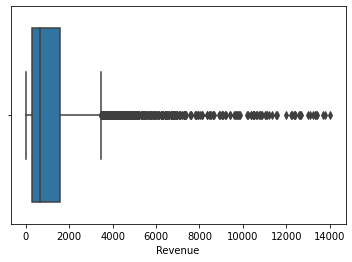

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


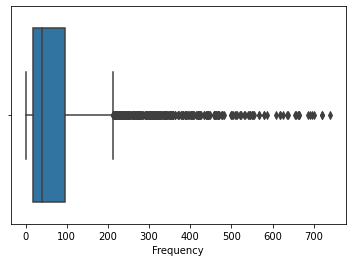

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


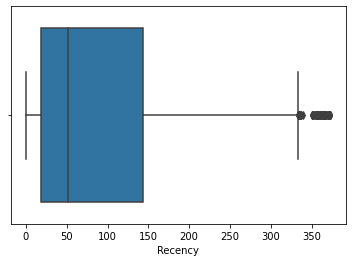

In [ ]:
sns.boxplot(rfm['Revenue'])
plt.show()
sns.boxplot(rfm['Frequency'])
plt.show()
sns.boxplot(rfm['Recency'])
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the ideal IQR method for outlier removal as it is the best measure of variability for skewed data.

### 3. Categorical Encoding

There is no need for categorical encoding in this data.

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

### Observing the distributions of variables and transforming them if needed.

In [ ]:
#Observing the distribution of the variables
def diagnostic_plot(data,variable):
  
  
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  data[variable].hist()
  plt.title(variable)
  
 
  plt.subplot(1,2,2)
  stats.probplot(data[variable],dist='norm',plot=plt)
  plt.show()


In [ ]:
def plot_features(data,list_variable):
  for i in list_variable:
    plot=diagnostic_plot(data,i)
  return plot

In [ ]:
plot_list=['Revenue','Recency','Frequency']

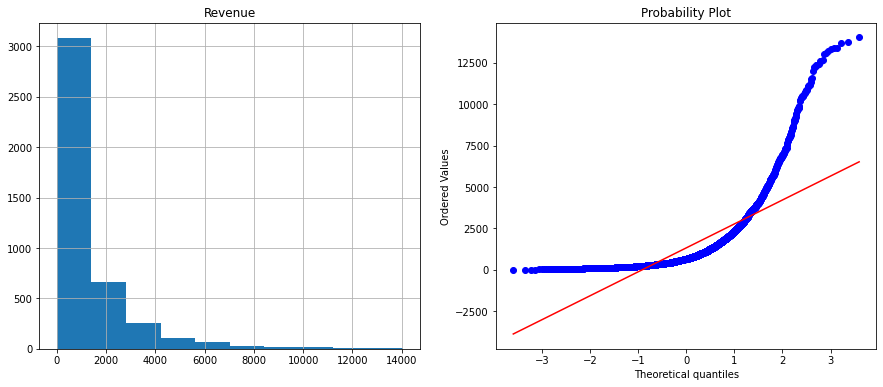

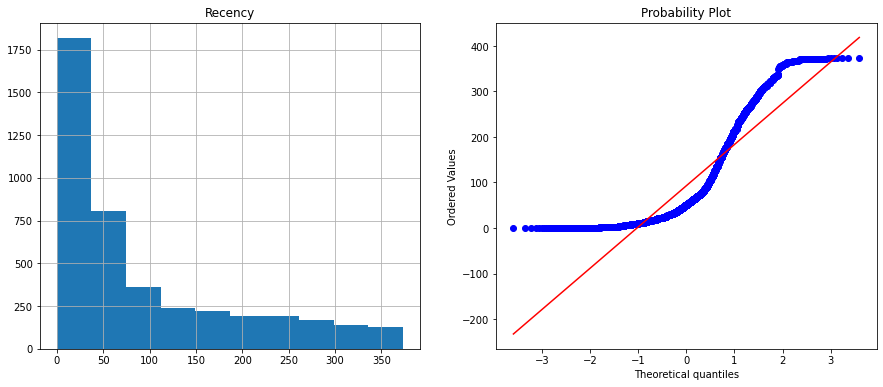

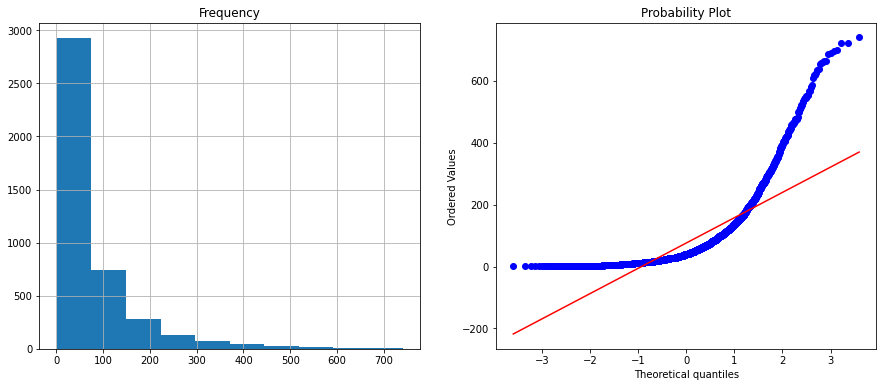

In [ ]:
plot_features(rfm,plot_list)

All the variables are right skewed. So transformation is required.

### 6. Data Scaling

In [ ]:
# Scaling your data

In [ ]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
nm=Normalizer()
sc=StandardScaler()
columns=['Revenue','Frequency','Recency']
rfm_sc=sc.fit_transform(rfm[columns])
rfm_sc=nm.fit_transform(rfm_sc)

In [ ]:
rfm_sc=pd.DataFrame(rfm_sc)

In [ ]:
rfm_sc.columns=['Revenue','Frequency','Recency']
rfm_sc.head()


Revenue  Frequency   Recency
0  0.761147   0.493432 -0.420928
1  0.475834  -0.812469 -0.336863
2  0.310875  -0.037672 -0.949704
3 -0.236103  -0.259424  0.936459
4  0.747876   0.104336 -0.655588

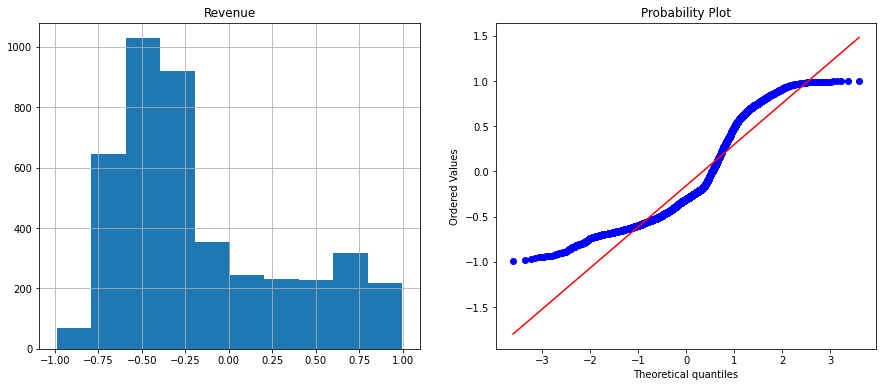

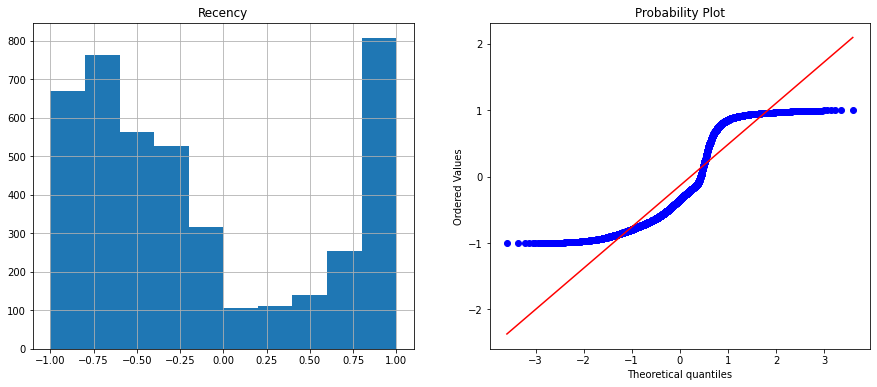

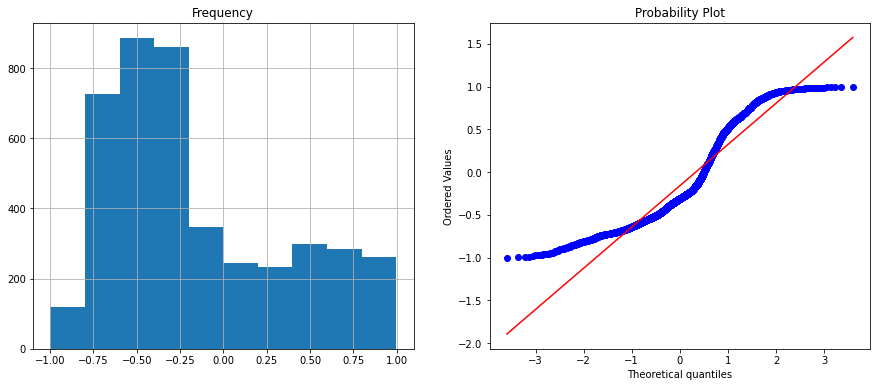

In [ ]:
plot_features(rfm_sc,plot_list)

##### Which method have you used to scale you data and why?

I have used both standard and normal scaler as it effectively scales the data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

The dataset doesnt contains large dimensions. So, dimensionality reduction is not needed.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
#Defining a function for cluster statistics and distribution of customers in the clusters.
def cluster_stats(model, data, data_scaled):
    df2 = data_scaled.copy()
    df2['Cluster'] = pd.Series(model, name= 'Cluster', index= data_scaled.index)
    
    cluster_stats = df2.groupby('Cluster').agg({'Recency': ['min', 'mean','max'],
                                       'Frequency': ['min', 'mean','max'],
                                       'Revenue': ['min', 'mean','max']}).copy().round(1)
    return cluster_stats, df2

In [ ]:
def clusters_distribution(df2, data):
    columns = {'#Customers':[]}
    indx =[]
    for i in np.sort(df2.Cluster.unique()):
        columns['#Customers'].append(data.iloc[df2.loc[df2.Cluster == i].index].shape[0])
        
        indx.append('Cluster{}'.format(i))
    
    # Synthesis a data frame for cluster summanry
    clusters_distribution = pd.DataFrame(data= columns, index = indx)

    clusters_distribution['%customers'] = (clusters_distribution['#Customers']/df2.shape[0])*100
    
    columnsOrder = ['#Customers', '%customers']
    return clusters_distribution.reindex(columns=columnsOrder) 

### ML Model - 1

### KMeans Clustering with Elbow method

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
from scipy.spatial.distance import cdist
from sklearn.metrics import davies_bouldin_score as db, calinski_harabasz_score as ch

In [ ]:
#Elbow method
from sklearn.cluster import KMeans
wcss=[] 
distortions=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(rfm_sc)
  wcss.append(kmeans.inertia_)
  distortions.append(sum(np.min(cdist(rfm_sc, kmeans.cluster_centers_,'euclidean'), axis=1)) / rfm_sc.shape[0])


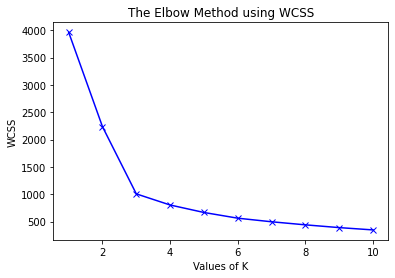

In [ ]:

plt.plot(range(1,11),wcss, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('WCSS')
plt.title('The Elbow Method using WCSS')
plt.show()

From the elbow method optimal number of clusters is 3

In [ ]:
from sklearn.metrics import silhouette_score

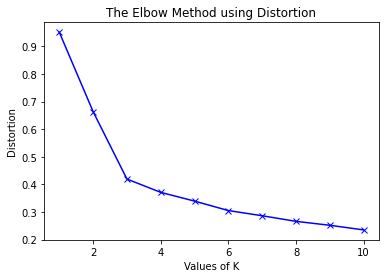

In [ ]:
plt.plot(range(1,11), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
kmeans_elb=KMeans(n_clusters=3,init='k-means++',random_state=42)

label_elb=kmeans_elb.fit_predict(rfm_sc)

score=silhouette_score(rfm_sc,label_elb,metric='euclidean')
score

0.561082026352452

In [ ]:
label_elb0 = rfm_sc[label_elb == 0]
label_elb1 = rfm_sc[label_elb == 1]
label_elb2 = rfm_sc[label_elb == 2]


  

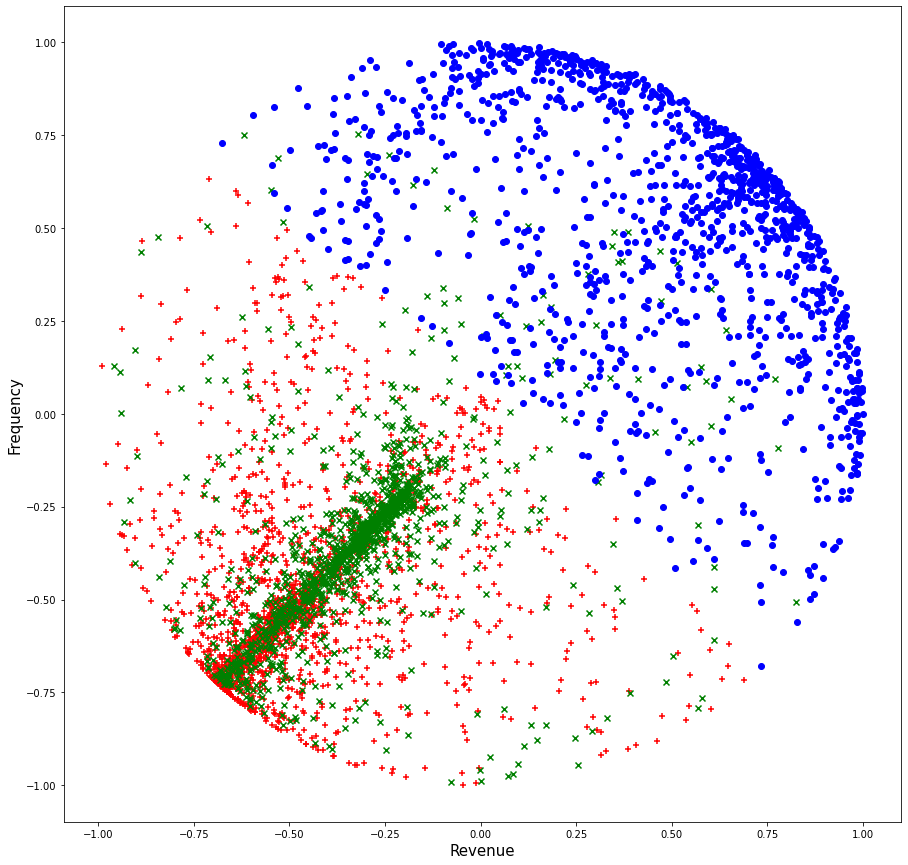

In [ ]:
#Cluster distribution between Revenue and Frequency
cols = label_elb0.columns
plt.figure(figsize=(15,15))
plt.scatter(label_elb0[cols[0]], label_elb0[cols[1]], color = 'red',marker='+')
plt.scatter(label_elb1[cols[0]], label_elb1[cols[1]], color = 'green',marker='x')
plt.scatter(label_elb2[cols[0]], label_elb2[cols[1]], color = 'blue',marker='o')
plt.xlabel('Revenue',size=15)
plt.ylabel('Frequency',size=15)

plt.show()

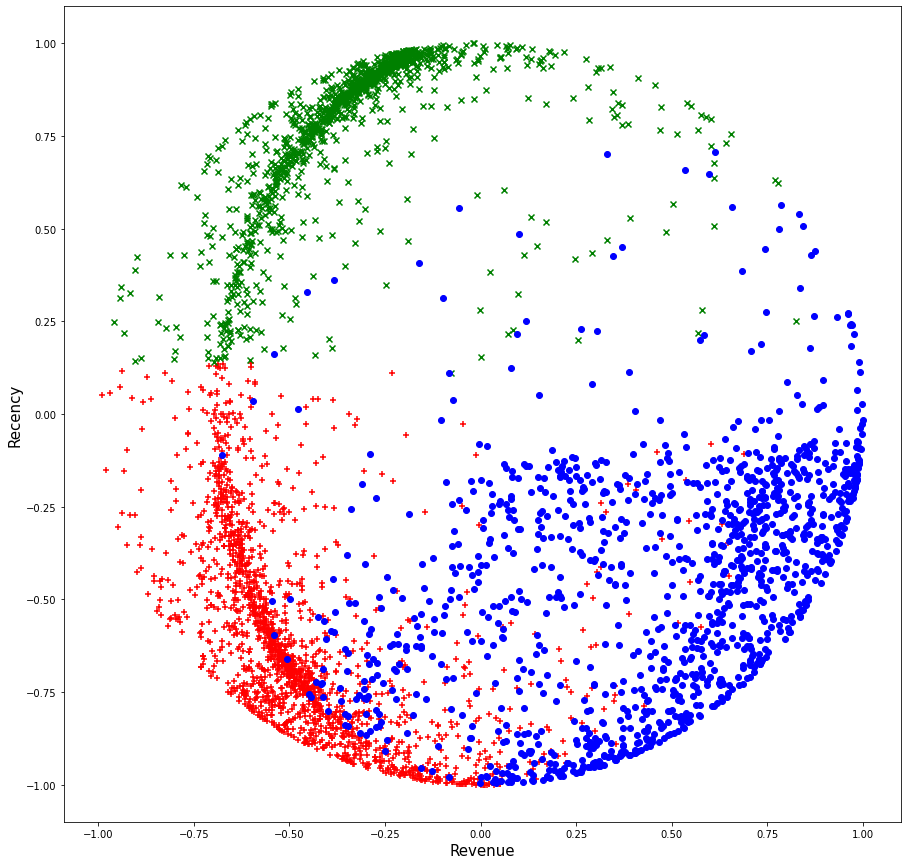

In [ ]:
#Cluster distribution between Revenue and Recency
plt.figure(figsize=(15,15))
plt.scatter(label_elb0[cols[0]], label_elb0[cols[2]], color = 'red',marker='+')
plt.scatter(label_elb1[cols[0]], label_elb1[cols[2]], color = 'green',marker='x')
plt.scatter(label_elb2[cols[0]], label_elb2[cols[2]], color = 'blue',marker='o')
plt.xlabel('Revenue',size=15)
plt.ylabel('Recency',size=15)
plt.show()

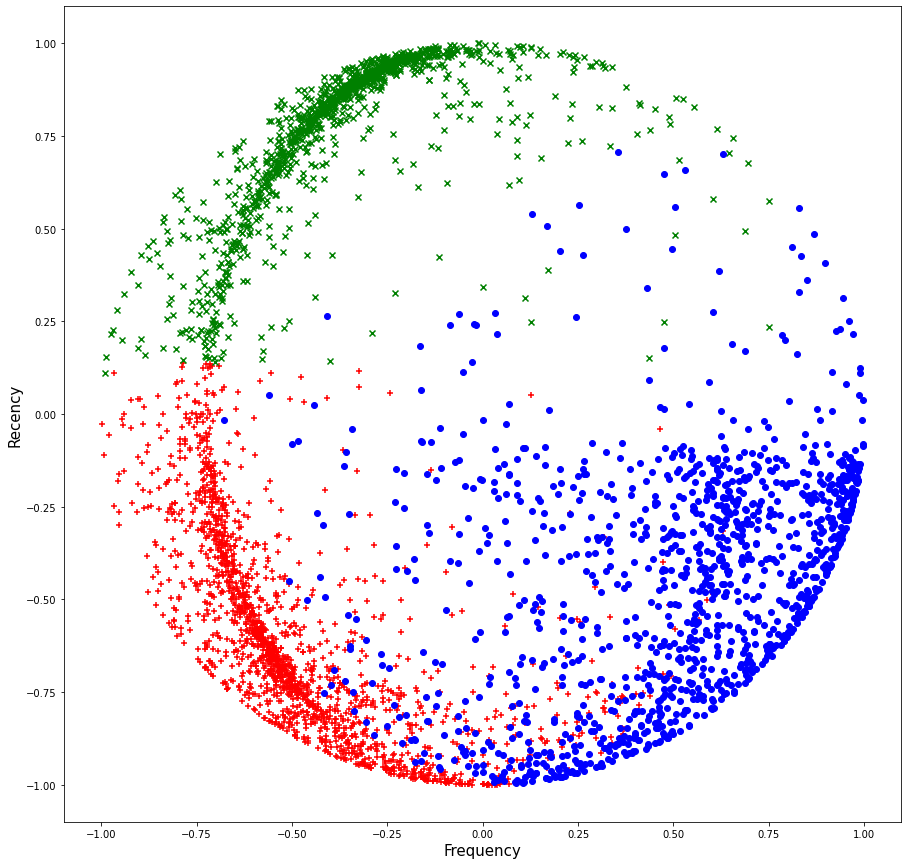

In [ ]:
#Cluster distribution between Frequency and Recency
plt.figure(figsize=(15,15))
plt.scatter(label_elb0[cols[1]], label_elb0[cols[2]], color = 'red',marker='+')
plt.scatter(label_elb1[cols[1]], label_elb1[cols[2]], color = 'green',marker='x')
plt.scatter(label_elb2[cols[1]], label_elb2[cols[2]], color = 'blue',marker='o')
plt.xlabel('Frequency',size=15)
plt.ylabel('Recency',size=15)
plt.show()

In [ ]:
rfm_sc_val=rfm_sc.values

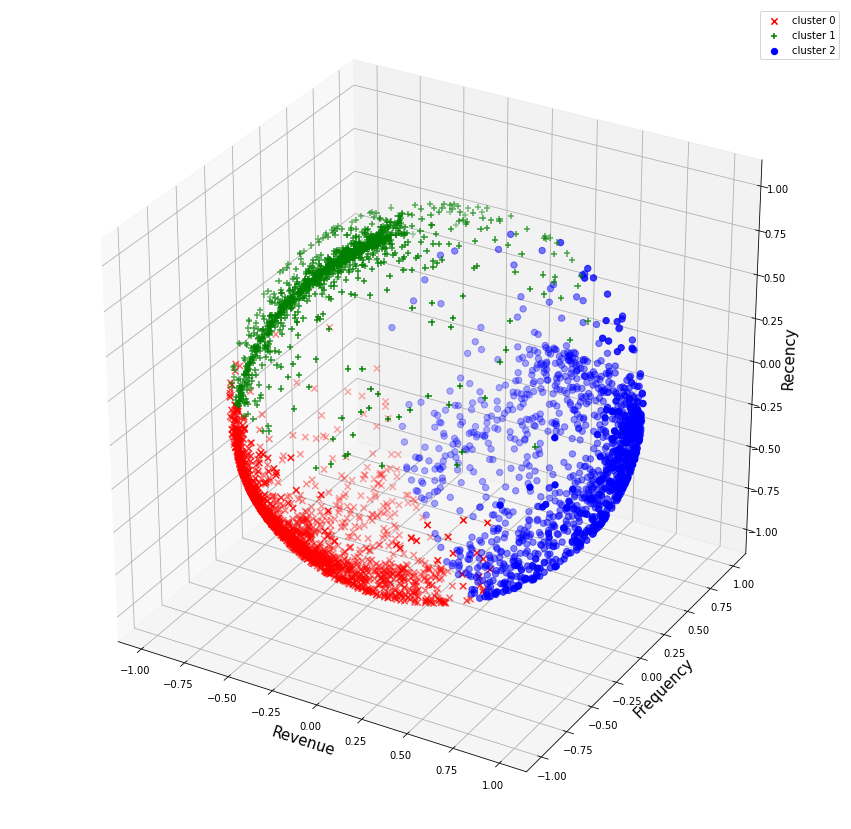

In [ ]:
#3D plot with all 3 variables

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_sc_val[label_elb == 0,0],rfm_sc_val[label_elb == 0,1],rfm_sc_val[label_elb == 0,2], s = 40 , color = 'red', marker='x', label = "cluster 0")
ax.scatter(rfm_sc_val[label_elb == 1,0],rfm_sc_val[label_elb == 1,1],rfm_sc_val[label_elb == 1,2], s = 40 , color = 'green',marker='+', label = "cluster 1")
ax.scatter(rfm_sc_val[label_elb == 2,0],rfm_sc_val[label_elb == 2,1],rfm_sc_val[label_elb == 2,2], s = 40 , color = 'blue',marker='o', label = "cluster 2")
ax.set_xlabel('Revenue',size=15)
ax.set_ylabel('Frequency',size=15)
ax.set_zlabel('Recency',size=15)
ax.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
km_elb_ch=ch(rfm_sc,label_elb)
km_elb_db=db(rfm_sc,label_elb)
km_elb_ss=silhouette_score(rfm_sc,label_elb)
km_elb_ch,km_elb_db,km_elb_ss

(6257.6448613633665, 0.6477710648148086, 0.561082026352452)

In [ ]:
cluster_stats(label_elb,rfm,rfm_sc)[0]

Recency           Frequency           Revenue          
            min mean  max       min mean  max     min mean  max
Cluster                                                        
0          -1.0 -0.6  0.1      -1.0 -0.5  0.6    -1.0 -0.5  0.7
1           0.1  0.8  1.0      -1.0 -0.4  0.8    -1.0 -0.3  0.8
2          -1.0 -0.4  0.7      -0.7  0.5  1.0    -0.7  0.5  1.0

In [ ]:
km_elb_dist=clusters_distribution(cluster_stats(label_elb,rfm,rfm_sc)[1],df)
km_elb_dist

#Customers  %customers
Cluster0        1748   41.042498
Cluster1        1298   30.476638
Cluster2        1213   28.480864

Text(0.5, 1.0, 'Distribution Of Customers with KMeans')

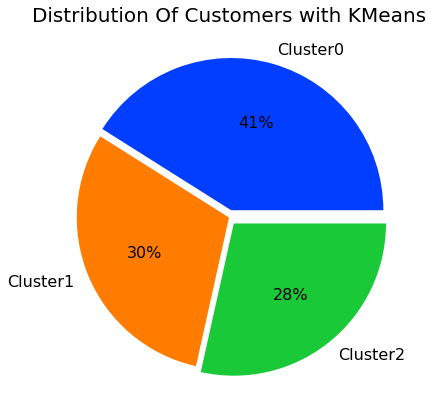

In [ ]:
#Plotting the distribution of customers
plt.figure(figsize=(7,7))
colors = sns.color_palette('bright')
plt.pie(km_elb_dist['%customers'], labels=km_elb_dist.index, autopct='%.0f%%',explode=(0.05,0,0.05),colors=colors,textprops={'fontsize': 16})
plt.title('Distribution Of Customers with KMeans',size=20)

### KMeans with Silhoutte Score

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

For n_clusters = 2 The average silhouette_score is : 0.4463563626641138


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


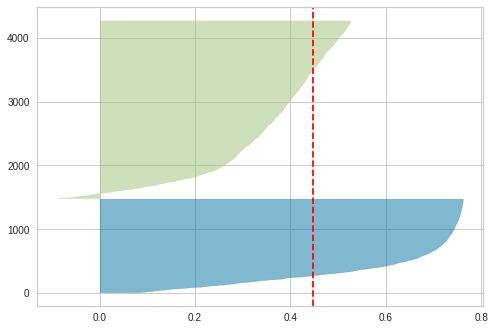

For n_clusters = 3 The average silhouette_score is : 0.5610526042932988


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


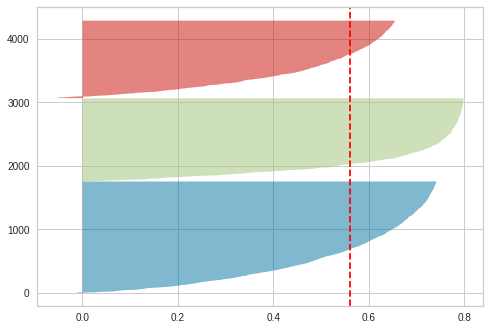

For n_clusters = 4 The average silhouette_score is : 0.4915926526170001


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


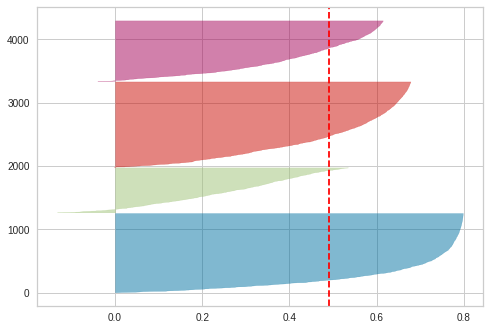

For n_clusters = 5 The average silhouette_score is : 0.4627928652651625


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


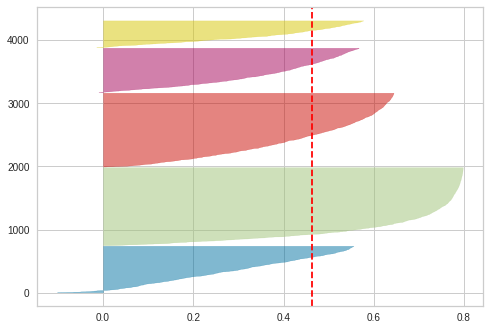

For n_clusters = 6 The average silhouette_score is : 0.45026842243423504


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


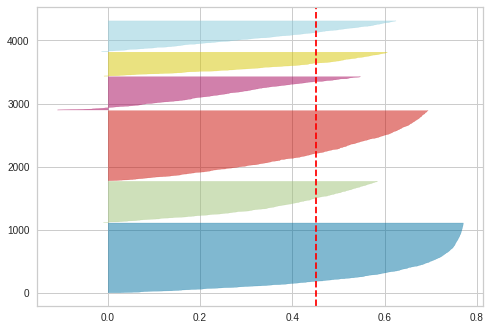

For n_clusters = 7 The average silhouette_score is : 0.42103473560116805


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


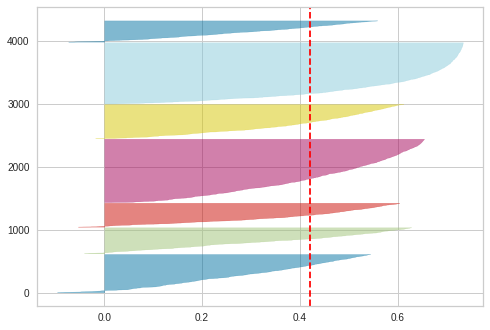

In [ ]:
clusters=range(2,8)
for i in clusters:
  clusterer = KMeans(n_clusters=i,init='k-means++', random_state=10)
  
  cluster_labels = clusterer.fit_predict(rfm_sc)
  silhouette_avg = silhouette_score(rfm_sc, cluster_labels)
  print("For n_clusters =",i,"The average silhouette_score is :", silhouette_avg)
  visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick')
  visualizer.fit(rfm_sc)
  plt.show()

From Silhoutte Analysis the optimal number of clusters is 3.

In [ ]:
rfm_sc1=rfm_sc.copy()
rfm_sc2=rfm_sc1.copy()
rfm_sc3=rfm_sc2.copy()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

### Agglomerative Clustering

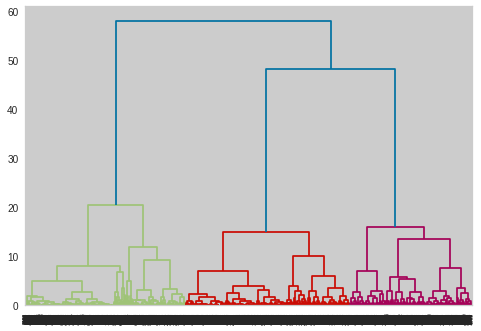

In [ ]:
#Kmowing the optimal number of clusters via Hierarchial Clustering
from scipy.cluster.hierarchy import dendrogram, linkage,cut_tree
linkage_data = linkage(rfm_sc1, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [ ]:
hc_labels=cut_tree(linkage_data,n_clusters=2).reshape(-1,)
np.unique(hc_labels)

array([0, 1])

In [ ]:
score_hc=silhouette_score(rfm_sc1,hc_labels,metric='euclidean')
score_hc

0.43500105869296984

According to the dendrogram the optimal number of clustering is 3.

In [ ]:
rfm_sc_val=rfm_sc2.values
rfm_sc1_val=rfm_sc1.values

### Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
label_ac=model.fit_predict(rfm_sc1)


In [ ]:
label_0ac = rfm_sc1[label_ac == 0]
label_1ac = rfm_sc1[label_ac == 1]
label_2ac = rfm_sc1[label_ac == 2]

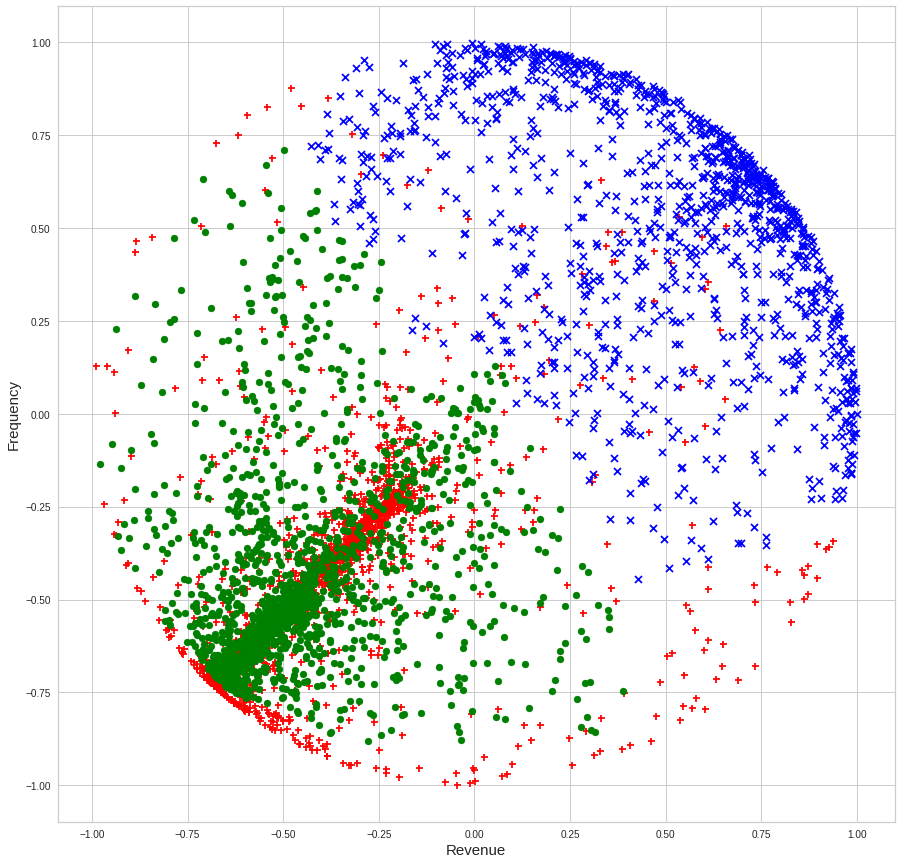

In [ ]:
#Cluster distribution between Frequency and Revenue
cols = label_0ac.columns
plt.figure(figsize=(15,15))
plt.scatter(label_0ac[cols[0]], label_0ac[cols[1]], color = 'red',marker='+')
plt.scatter(label_1ac[cols[0]], label_1ac[cols[1]], color = 'blue',marker='x')
plt.scatter(label_2ac[cols[0]], label_2ac[cols[1]], color = 'green',marker='o')
plt.xlabel('Revenue',size=15)
plt.ylabel('Frequency',size=15)
plt.show()

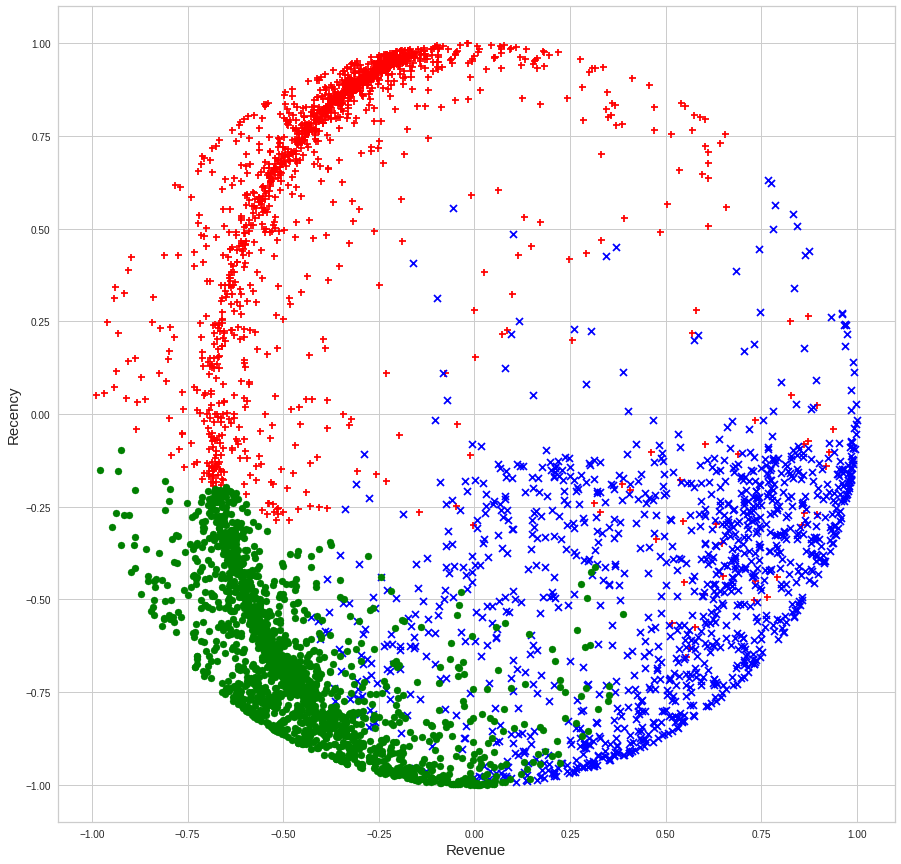

In [ ]:
#Cluster distribution between Recency and Revenue
cols = label_0ac.columns
plt.figure(figsize=(15,15))
plt.scatter(label_0ac[cols[0]], label_0ac[cols[2]], color = 'red',marker='+')
plt.scatter(label_1ac[cols[0]], label_1ac[cols[2]], color = 'blue',marker='x')
plt.scatter(label_2ac[cols[0]], label_2ac[cols[2]], color = 'green',marker='o')
plt.xlabel('Revenue',size=15)
plt.ylabel('Recency',size=15)
plt.show()

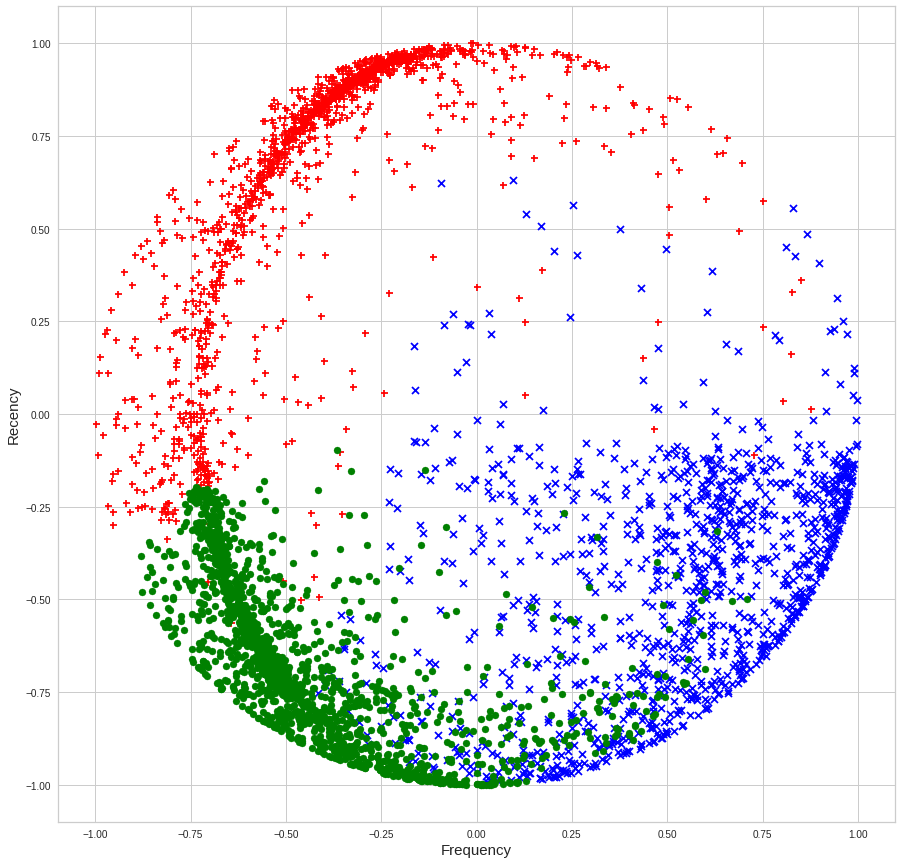

In [ ]:
#Cluster distribution between Frequency and Recency
cols = label_0ac.columns
plt.figure(figsize=(15,15))
plt.scatter(label_0ac[cols[1]], label_0ac[cols[2]], color = 'red',marker='+')
plt.scatter(label_1ac[cols[1]], label_1ac[cols[2]], color = 'blue',marker='x')
plt.scatter(label_2ac[cols[1]], label_2ac[cols[2]], color = 'green',marker='o')
plt.xlabel('Frequency',size=15)
plt.ylabel('Recency',size=15)

plt.show()

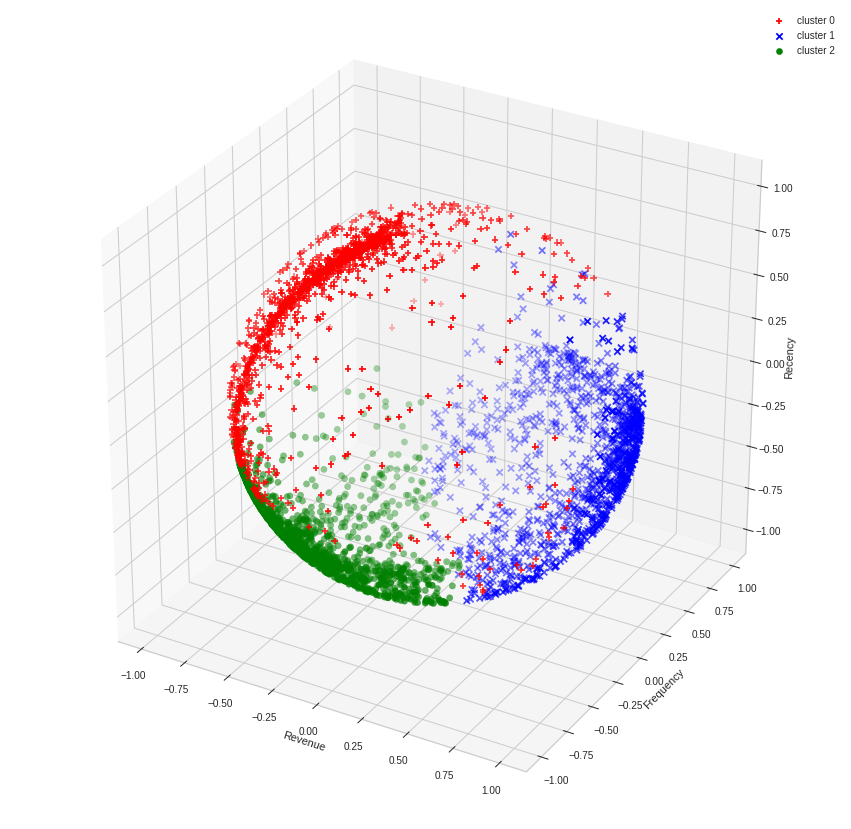

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_sc1_val[label_ac == 0,0],rfm_sc1_val[label_ac == 0,1],rfm_sc1_val[label_ac == 0,2], s = 40 , color = 'red',marker='+', label = "cluster 0")
ax.scatter(rfm_sc1_val[label_ac == 1,0],rfm_sc1_val[label_ac == 1,1],rfm_sc1_val[label_ac == 1,2], s = 40 , color = 'blue',marker='x', label = "cluster 1")
ax.scatter(rfm_sc1_val[label_ac == 2,0],rfm_sc1_val[label_ac == 2,1],rfm_sc1_val[label_ac == 2,2], s = 40 , color = 'green',marker='o', label = "cluster 2")
ax.set_xlabel('Revenue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart


In [ ]:
ac_ch=ch(rfm_sc1,label_ac)
ac_db=db(rfm_sc1,label_ac)
ac_ss=silhouette_score(rfm_sc1,label_ac)
ac_ch,ac_db,ac_ss

(5427.080599371535, 0.6610179431646742, 0.5250486369410745)

In [ ]:
cluster_stats(label_ac,rfm,rfm_sc1)[0]

Recency           Frequency           Revenue          
            min mean  max       min mean  max     min mean  max
Cluster                                                        
0          -0.7  0.6  1.0      -1.0 -0.4  0.9    -1.0 -0.3  0.9
1          -1.0 -0.5  0.6      -0.4  0.5  1.0    -0.4  0.5  1.0
2          -1.0 -0.7 -0.1      -0.9 -0.4  0.7    -1.0 -0.4  0.4

In [ ]:
ac_dist=clusters_distribution(cluster_stats(label_ac,rfm,rfm_sc1)[1],df)
ac_dist

#Customers  %customers
Cluster0        1525   35.806527
Cluster1        1164   27.330359
Cluster2        1570   36.863113

Text(0.5, 1.0, 'Distribution Of Customers with Agglomerative Clustering')

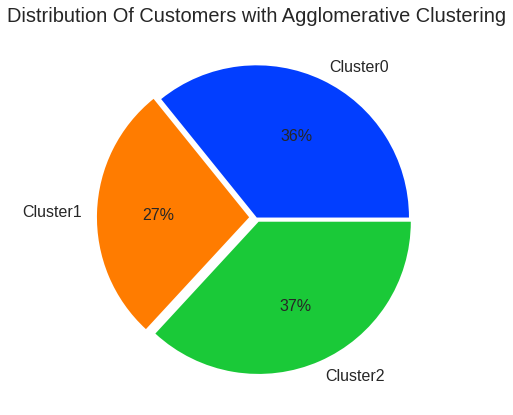

In [ ]:
#Plotting the distribution of customers
plt.figure(figsize=(7,7))
colors = sns.color_palette('bright')
plt.pie(ac_dist['%customers'], labels=ac_dist.index, autopct='%.0f%%',explode=(0,0.05,0.03),colors=colors,textprops={'fontsize': 16})
plt.title('Distribution Of Customers with Agglomerative Clustering',size=20)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

### Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering
spec_c=SpectralClustering(n_clusters=3,random_state=42,n_neighbors=20)
label_sc=spec_c.fit_predict(rfm_sc1)


In [ ]:
np.unique(label_sc)

array([0, 1, 2], dtype=int32)

In [ ]:
label_0sc = rfm_sc1[label_sc == 0]
label_1sc = rfm_sc1[label_sc == 1]
label_2sc = rfm_sc1[label_sc == 2]

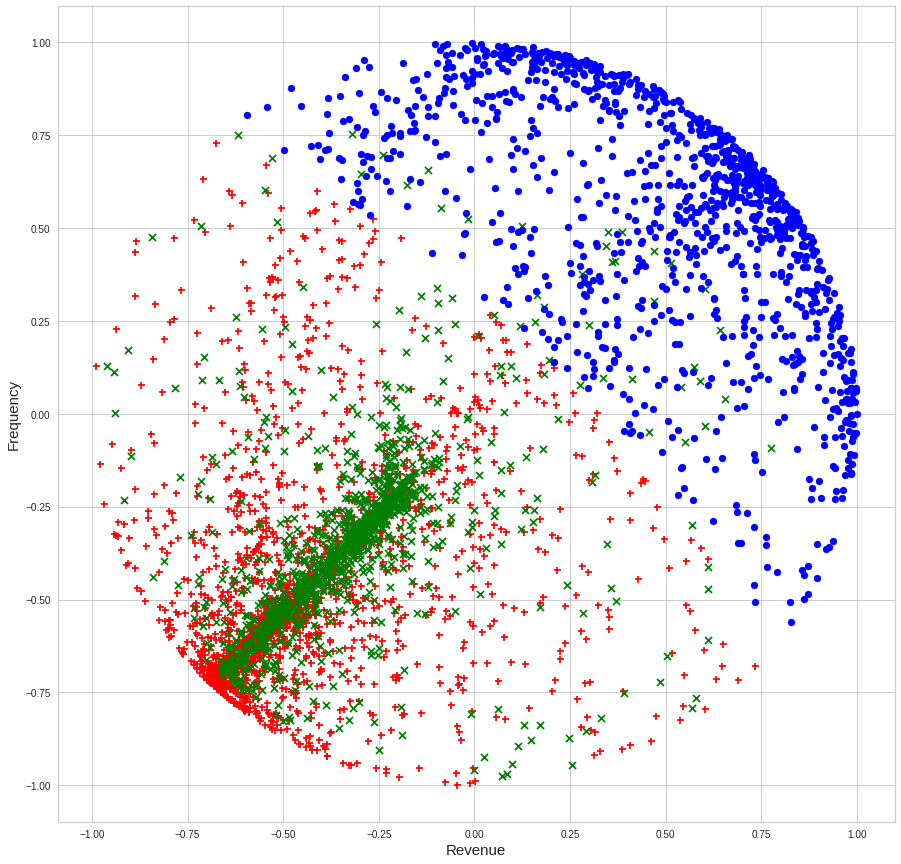

In [ ]:
#Cluster distribution between Frequency and Revenue
cols = label_0sc.columns
plt.figure(figsize=(15,15))
plt.scatter(label_0sc[cols[0]], label_0sc[cols[1]], color = 'red',marker='+')
plt.scatter(label_1sc[cols[0]], label_1sc[cols[1]], color = 'green',marker='x')
plt.scatter(label_2sc[cols[0]], label_2sc[cols[1]], color = 'blue',marker='o')
plt.xlabel('Revenue',size=15)
plt.ylabel('Frequency',size=15)
plt.show()

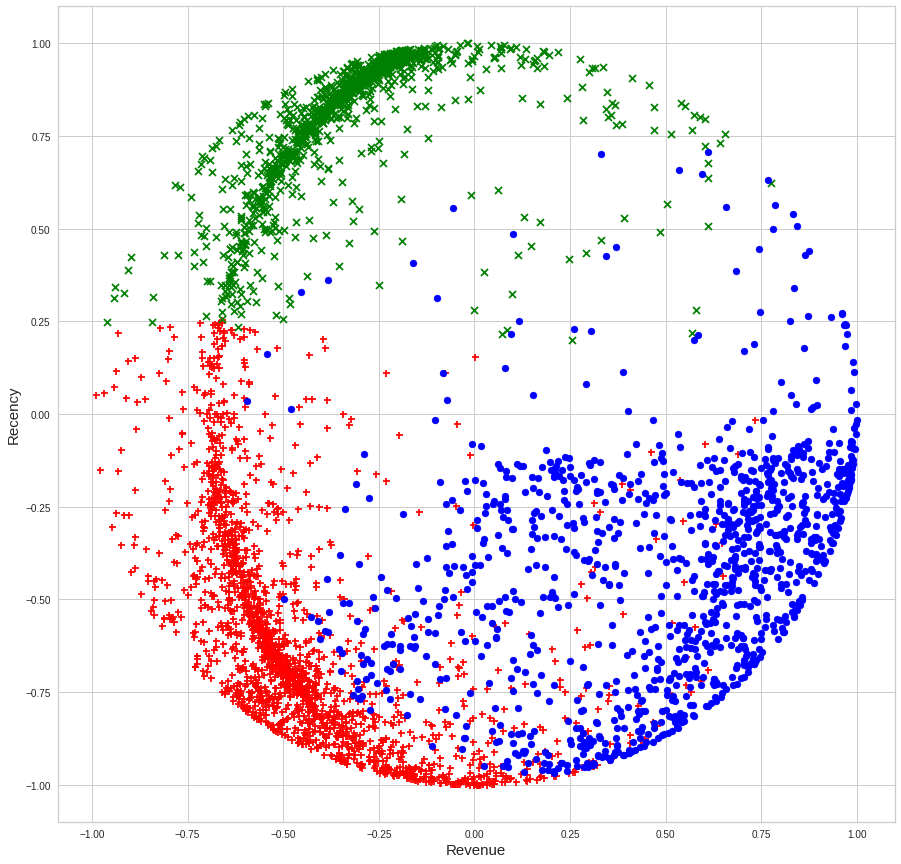

In [ ]:
#Cluster distribution between Revenue and Recency
cols = label_0sc.columns
plt.figure(figsize=(15,15))
plt.scatter(label_0sc[cols[0]], label_0sc[cols[2]], color = 'red',marker='+')
plt.scatter(label_1sc[cols[0]], label_1sc[cols[2]], color = 'green',marker='x')
plt.scatter(label_2sc[cols[0]], label_2sc[cols[2]], color = 'blue',marker='o')
plt.xlabel('Revenue',size=15)
plt.ylabel('Recency',size=15)
plt.show()

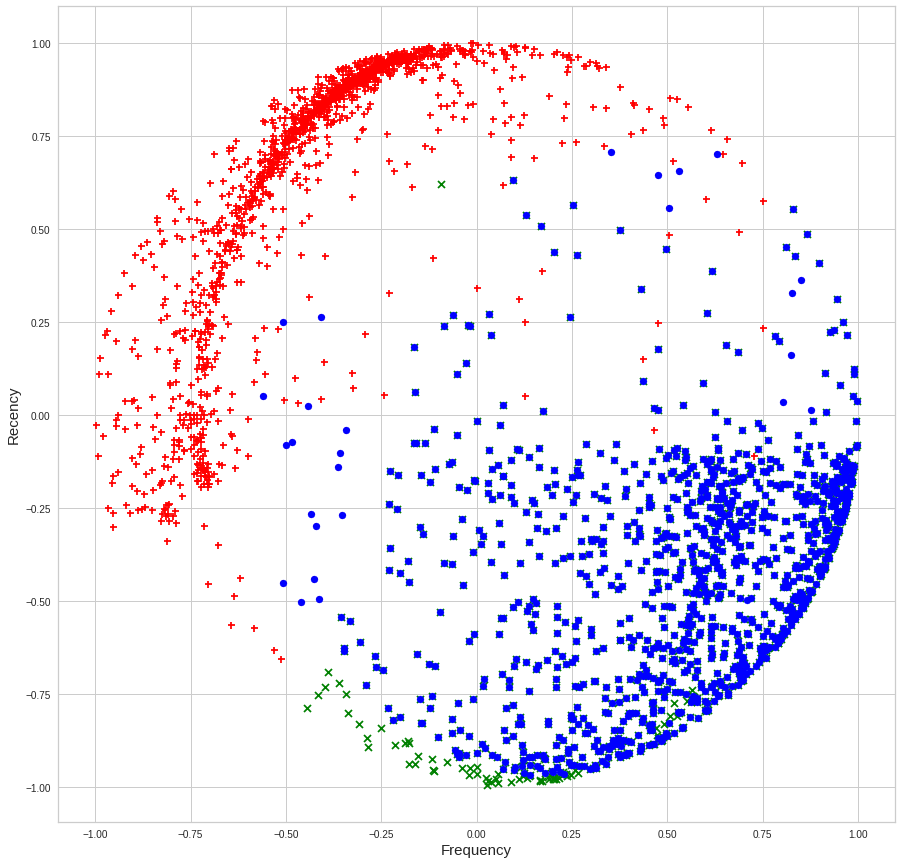

In [ ]:
#Cluster distribution between Frequency and Recency
cols = label_0ac.columns
plt.figure(figsize=(15,15))
plt.scatter(label_0ac[cols[1]], label_0ac[cols[2]], color = 'red',marker='+')
plt.scatter(label_1ac[cols[1]], label_1ac[cols[2]], color = 'green',marker='x')
plt.scatter(label_2sc[cols[1]], label_2sc[cols[2]], color = 'blue',marker='o')
plt.xlabel('Frequency',size=15)
plt.ylabel('Recency',size=15)

plt.show()

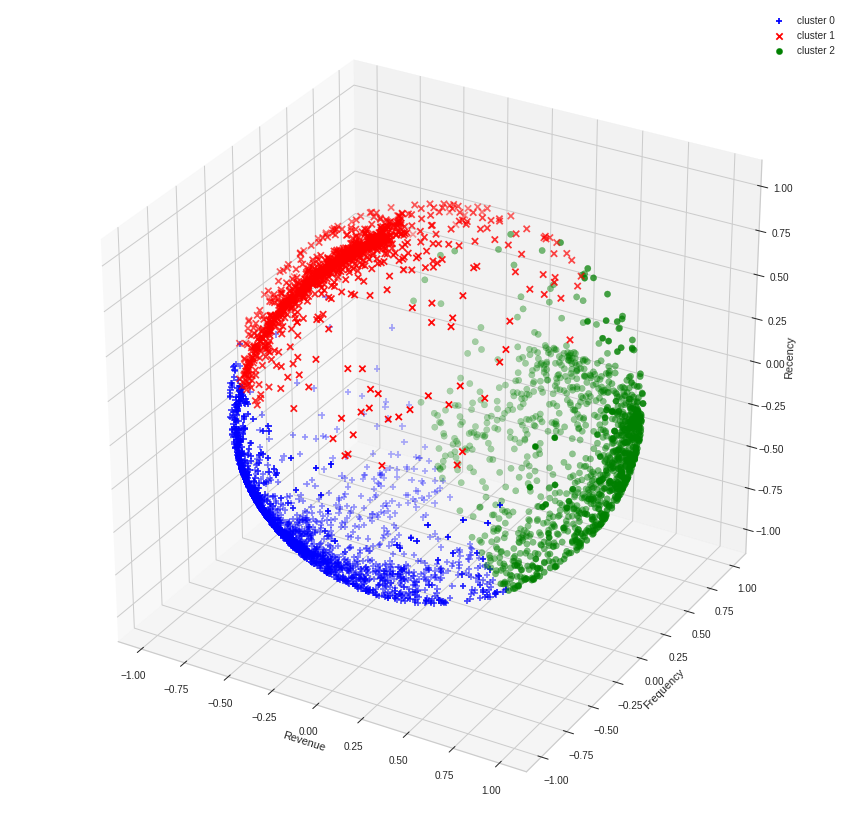

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_sc1_val[label_sc == 0,0],rfm_sc1_val[label_sc == 0,1],rfm_sc1_val[label_sc == 0,2], s = 40 , color = 'blue',marker='+', label = "cluster 0")
ax.scatter(rfm_sc1_val[label_sc == 1,0],rfm_sc1_val[label_sc == 1,1],rfm_sc1_val[label_sc == 1,2], s = 40 , color = 'red',marker='x', label = "cluster 1")
ax.scatter(rfm_sc1_val[label_sc == 2,0],rfm_sc1_val[label_sc == 2,1],rfm_sc1_val[label_sc == 2,2], s = 40 , color = 'green',marker='o', label = "cluster 2")
ax.set_xlabel('Revenue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

In [ ]:
sc_ch=ch(rfm_sc1,label_sc)
sc_db=db(rfm_sc1,label_sc)
sc_ss=silhouette_score(rfm_sc1,label_sc)
sc_ch,sc_db,sc_ss

(6068.817415814414, 0.6538882630827972, 0.5564091954730764)

In [ ]:
cluster_stats(label_sc,rfm,rfm_sc1)[0]

Recency           Frequency           Revenue          
            min mean  max       min mean  max     min mean  max
Cluster                                                        
0          -1.0 -0.6  0.3      -1.0 -0.4  0.7    -1.0 -0.4  0.7
1           0.2  0.8  1.0      -1.0 -0.3  0.8    -1.0 -0.3  0.8
2          -1.0 -0.4  0.7      -0.6  0.5  1.0    -0.6  0.5  1.0

In [ ]:
sc_dist=clusters_distribution(cluster_stats(label_sc,rfm,rfm_sc1)[1],df)
sc_dist

#Customers  %customers
Cluster0        1888   44.329655
Cluster1        1245   29.232214
Cluster2        1126   26.438131

Text(0.5, 1.0, 'Distribution Of Customers with Spectral Clustering')

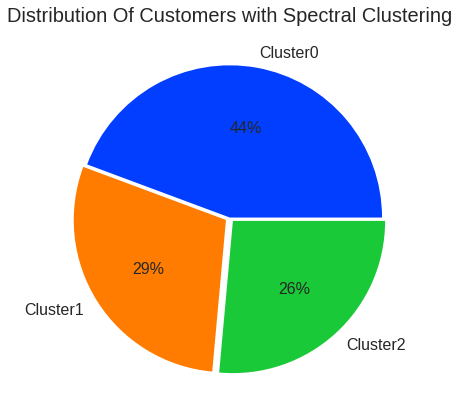

In [ ]:
#Plotting the distribution of customers
plt.figure(figsize=(7,7))
colors = sns.color_palette('bright')
plt.pie(sc_dist['%customers'], labels=sc_dist.index, autopct='%.0f%%',explode=(0,0.03,0.03),colors=colors,textprops={'fontsize': 16})
plt.title('Distribution Of Customers with Spectral Clustering',size=20)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

# DBSCAN 

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps = 0.2, min_samples = 20).fit_predict(rfm_sc3) # fitting the model


In [ ]:
np.unique(dbscan)

array([-1,  0])

In [ ]:
label_0db = rfm_sc3[dbscan == 0]
label_1db = rfm_sc3[dbscan == -1]

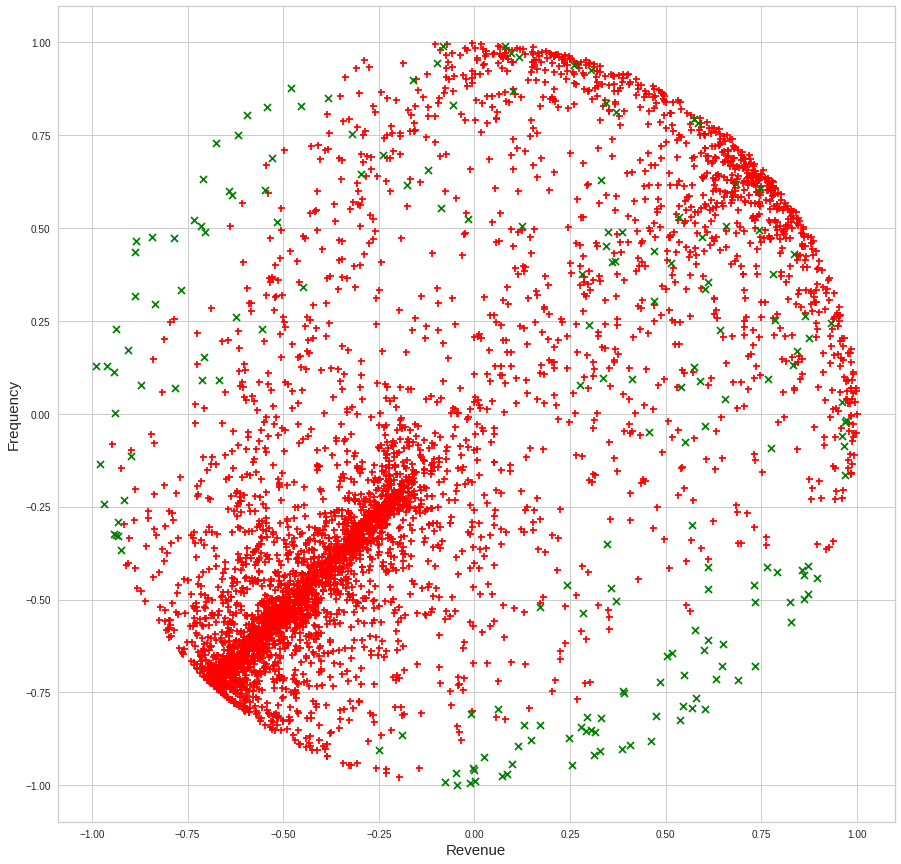

In [ ]:
#Cluster distribution between Frequency and Revenue
cols = label_0db.columns
plt.figure(figsize=(15,15))
plt.scatter(label_0db[cols[0]], label_0db[cols[1]], color = 'red',marker='+')
plt.scatter(label_1db[cols[0]], label_1db[cols[1]], color = 'green',marker='x')
plt.xlabel('Revenue',size=15)
plt.ylabel('Frequency',size=15)

plt.show()

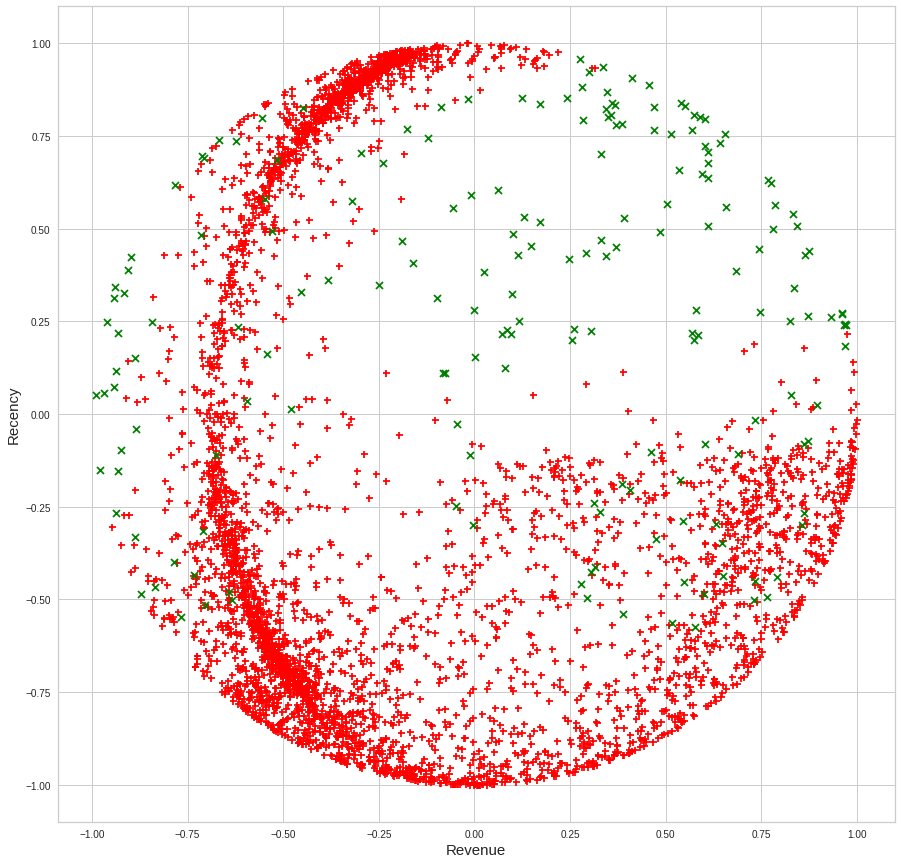

In [ ]:
#Cluster distribution between Revenue and Recency
plt.figure(figsize=(15,15))
plt.scatter(label_0db[cols[0]], label_0db[cols[2]], color = 'red',marker='+')
plt.scatter(label_1db[cols[0]], label_1db[cols[2]], color = 'green',marker='x')
plt.xlabel('Revenue',size=15)
plt.ylabel('Recency',size=15)
plt.show()

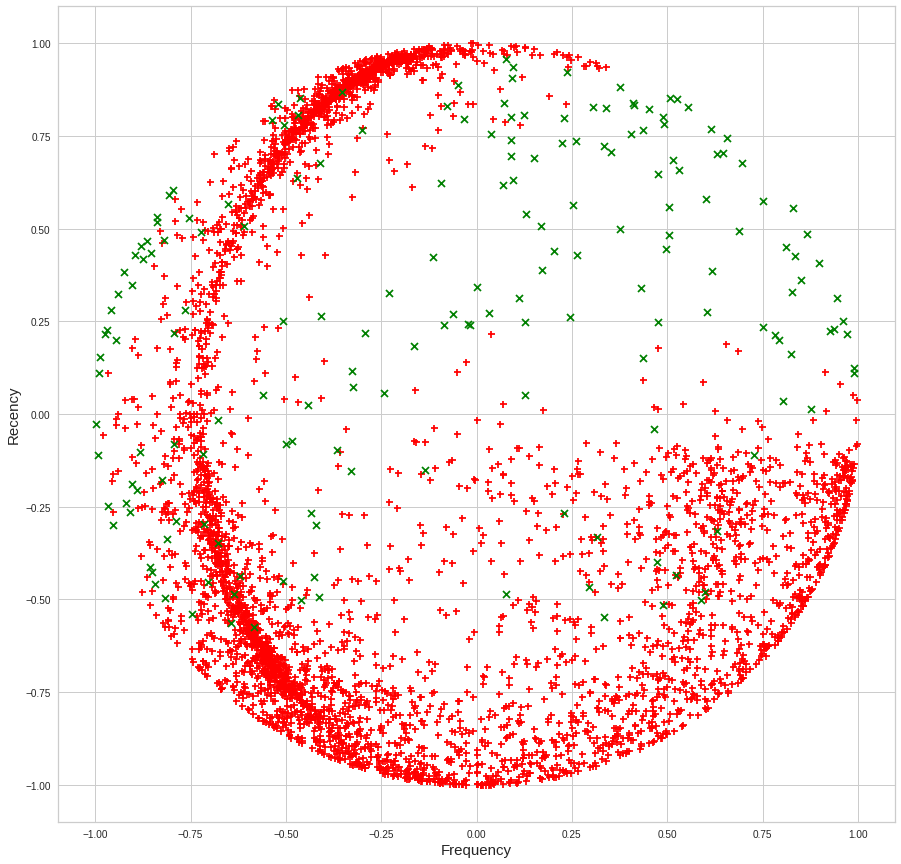

In [ ]:
#Cluster distribution between Frequency and Recency
plt.figure(figsize=(15,15))
plt.scatter(label_0db[cols[1]], label_0db[cols[2]], color = 'red',marker='+')
plt.scatter(label_1db[cols[1]], label_1db[cols[2]], color = 'green',marker='x')
plt.xlabel('Frequency',size=15)
plt.ylabel('Recency',size=15)
plt.show()

In [ ]:
rfm_sc3_val=rfm_sc3.values

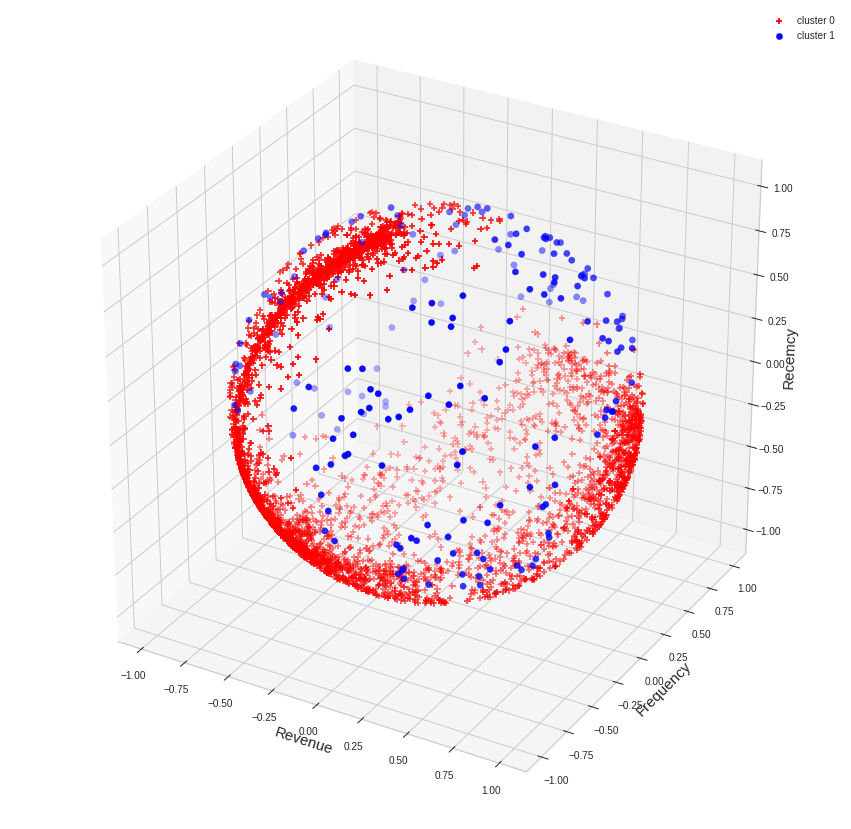

In [ ]:
#3D plot with all 3 variables

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_sc3_val[dbscan == 0,0],rfm_sc3_val[dbscan == 0,1],rfm_sc3_val[dbscan == 0,2], s = 40 , color = 'red',marker='+', label = "cluster 0")
ax.scatter(rfm_sc3_val[dbscan == -1,0],rfm_sc3_val[dbscan == -1,1],rfm_sc3_val[dbscan == -1,2], s = 40 , color = 'blue',marker='o' ,label = "cluster 1")
ax.set_xlabel('Revenue',size=15)
ax.set_ylabel('Frequency',size=15)
ax.set_zlabel('Recemcy',size=15)
ax.legend()
plt.show()

### Model Evaluation

In [ ]:
db_ch=ch(rfm_sc3,dbscan)
db_db=db(rfm_sc3,dbscan)
db_ss=silhouette_score(rfm_sc3,dbscan)
db_ch,db_db,db_ss

(56.903785183362636, 3.4755065981292246, 0.11897872213855495)

In [ ]:
cluster_stats(dbscan,rfm,rfm_sc3)[0]

Recency           Frequency           Revenue          
            min mean  max       min mean  max     min mean  max
Cluster                                                        
-1         -0.6  0.3  1.0      -1.0 -0.1  1.0    -1.0  0.1  1.0
 0         -1.0 -0.2  1.0      -1.0 -0.2  1.0    -0.9 -0.2  1.0

In [ ]:
db_dist=clusters_distribution(cluster_stats(dbscan,rfm,rfm_sc3)[1],df)
db_dist

#Customers  %customers
Cluster-1         187    4.390702
Cluster0         4072   95.609298

Text(0.5, 1.0, 'Distribution Of Customers with DBSCAN')

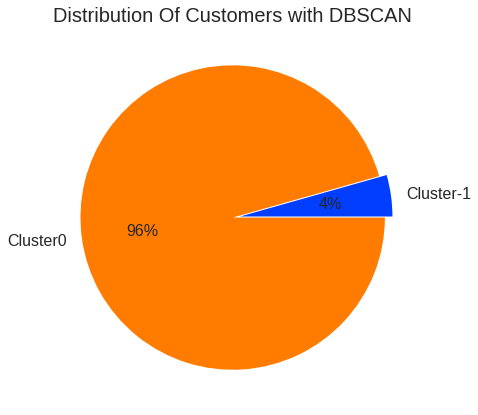

In [ ]:
#Plotting the distribution of customers
plt.figure(figsize=(7,7))
colors = sns.color_palette('bright')
plt.pie(db_dist['%customers'], labels=db_dist.index, autopct='%.0f%%',explode=(0.05,0),colors=colors,textprops={'fontsize': 16})
plt.title('Distribution Of Customers with DBSCAN',size=20)

# Model Evaluation summary


In [ ]:
eval={'Models':['KMeans Clustering','Agglomerative Clustering','DBSCAN','Spectral CLustering'],'Davies Bouldin Score':[km_elb_db,ac_db,db_db,sc_db],'Calinski Harabasz Score':[km_elb_ch,ac_ch,db_ch,sc_ch],'Silhouette Score':[km_elb_ss,ac_ss,db_ss,sc_ss]}
eval_df=pd.DataFrame(eval)
eval_df


Models  Davies Bouldin Score  Calinski Harabasz Score  \
0         KMeans Clustering              0.647771              6257.644861   
1  Agglomerative Clustering              0.661018              5427.080599   
2                    DBSCAN              3.475507                56.903785   
3       Spectral CLustering              0.653888              6068.817416   

   Silhouette Score  
0          0.561082  
1          0.525049  
2          0.118979  
3          0.556409

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhoutte score can be used to be the best metrics according to popular knowledge.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

> From the evaluation metrics, KMeans Clustering has the lowest Davies Bouldin Score and highest Calinski Harabasz Score and Silhouette Score.


> It is observed that in KMeans Clustering, Cluster 0 contains 41% of the customers , Cluster 1 contains 29% of the customers and the Cluster 2 contains 30% of the customers. So the distribution is quite acceptable.


> So, we choose KMeans Clustering as the optimal model for our problem

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**




**EDA Conclusions**

• World War 2 Gliders Asstd Design is the product ordered in higher quantity.

• Dotcom Postage is the most expensive product.

• Pads to match all cushions and pop art wooden pencils asst are the most inexpensive 
product.

• White Hanging Heart T-Light Holder is the most frequently ordered product.

• The UK generates the highest revenue followed by the Netherlands.

• Most of the customers belong to the UK.

• USA has the highest order cancellation %.

• The highest revenue is generated in November.

• The highest number of orders are placed in November.

• Thursday receives the highest number of orders.

• The 6th day of the month receives the highest number of orders. The number of orders 
in the 1st 8 days of the month is comparatively higher than the rest of the days.


**Model Conclusions**

• From the evaluation metrics, KMeans Clustering has the lowest Davies 
Bouldin Score and highest Calinski Harabasz Score and Silhouette 
Score.

• It is observed that in KMeans Clustering, Cluster 0 contains 41% of the 
customers , Cluster 1 contains 29% of the customers and the Cluster 2 
contains 30% of the customers. So the distribution is quite acceptable.

• So, we choose KMeans Clustering as the optimal model for our problem.


*   Cluster 0 contains the customers who have not made a recent purchase. They are not frequent buyers and also do not contribute much to the revenue as well.
*   Cluster 1 contains the customers who have made a recent purchase. They are not frequent buyers and do not have a considerable contribution in the revenue.

*   Cluster 2 contains the customers who have not made a recent purchase. They are frequent buyers and  contribute majorly to the revenue.




**So, the company should focus more on the customers in CLuster 2 as they are the most important segment.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***